**IE 7300: Statistical learning for Engineering** 

In [ ]:
from datetime import date
studentName="Jessica Tanumihardja"
studentEmail="tanumihardja.j@northeastern.edu"
#project=4
contributedPercentage=100
print("IE 7300: Statistical learning for Engineering (Fall 2022)")
print("\n"*15)
print("Final Project Code")
print(f'Student name :{studentName}')
print(f'Student Email :{studentEmail}')
print("\n"*15)
print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7300: Statistical learning for Engineering (Fall 2022)
















Final Project Code
Student name :Jessica Tanumihardja
Student Email :tanumihardja.j@northeastern.edu
















Percentage of Effort Contributed by Student : 100%
Submission Date: 2022-12-04


**Project Checkpoint #3:**
Models training and selection


# Project Requirement

**For the class project should be an individual project**.
* You can only pick your dataset from UCI data repository (https://archivebeta.
ics.uci.edu/) by Sunday Sep 11th 2022. No dataset from Kaggle or other
dataset repositories.
* You can choose any of the following algorithm topics:
> * o Classification
> * o Regression
> * o Dimensionality reduction
> * o Clustering
* Choose a dataset that number of rows are greater than 10000 records and 14 features.
* Each dataset can only be used by one group (First choose first pick). each team is required to announce their dataset through the Canvas Discussion channel.
* Write 2 pages project planning and description (For example, what is the objective, what is the dataset, how are you planning to solve this) by Sunday Sep 18th 2022 and submit it through Canvas (file type should be PDF).
* You are required to use python for your project. You cannot use any libraries for your model development such as sklearn or other statistical model libraries (you can only use: Numpy, Pandas, Keras, pytorch, and Tensorflow) and you need to write your own code. That means you have to implement the model functionality through your code. You may use any
other libraries to verify your results.
* Your model performance is not the metric for the evaluation, and I will evaluate based on your understanding of the concept.
* You will present your project in the last session of the class. (optional)

* You need to submit your fully functional code as part of your submission.
* You do need to upload your code to your GITHUB (Links to an external site.) account. If you do not have a GIT account, then it is time to make one.


NOTE: This code is accompanied by the project report submitted in pdf. 

## Chosen dataset

**Beijing Multi-Site Air-Quality Data**
https://archive-beta.ics.uci.edu/ml/datasets/beijing+multi+site+air+quality+data

* the dataset has 6 main air pollutants + 6 relevant meteorological variables for 12 different stations every hour (so total 14 parameters including time)
* Total number of rows is 420,768
* Chosen algorithm: **REGRESSION**


# Preliminary test dataset

(from Project Checkpoint #1)

The files are separated per cities. Therefore, it needs to be compiled to one dataframe (provided in next section). 
<br>
**Test loading 1st csv file first:**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#not used at Jupyter notebook

Mounted at /content/drive


In [ ]:
#import necessary library
import pandas as pd
import numpy as np
import os
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/Users/jtanu/Documents/Northeastern/2022 FALL/IE 7300/Assignments/Project/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df1

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [ ]:
df1.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

**Data Info and Statistics**

In [ ]:
#checking shape
print(df1.shape) 

(35064, 18)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
df1.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Understanding Data:**
<br>
* First column ["No"] is the same as index. It can be removed.

* Combine the time stamps ["year", "month", "day", "hour"] to one column and convert it to timestamp. But the original column will be left as is to analyze the seasonal data yearly, monthly, or daily.

* Column # 15 and 17 ["wd", "station"] are categorical in object datatype, so need to be converted to boolean

**Visualizing dataset**
<br>
to check relationship and if it follows normal distribution

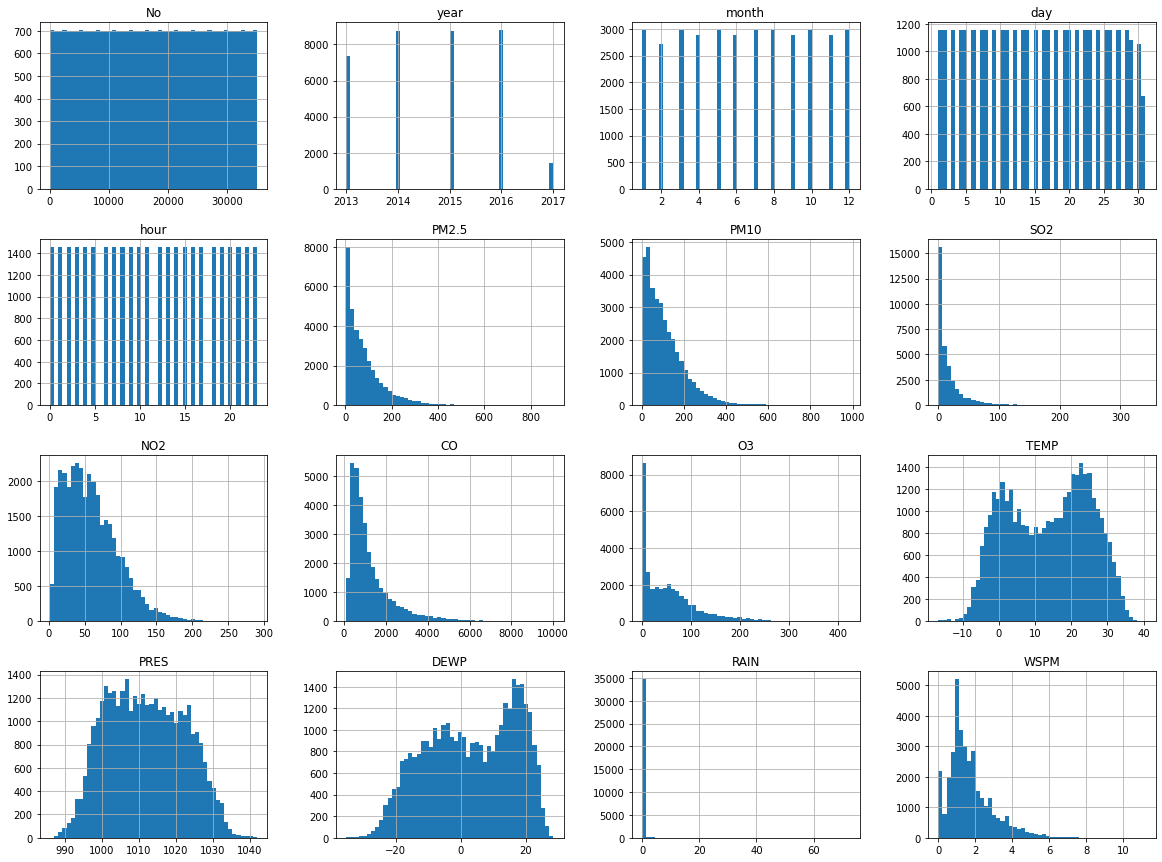

In [ ]:
#plot the histogram to see the pattern of each variable (normally distributed?)
df1.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots_A")
plt.show()

* The 6 atmospheric variables follows exponential reduction pattern
* Temperature, Pressure, and Dewpoint follows normal distribution
* WSPM (wind speed (m/s)) follows a skewed normal distribution.
* Rain (rainfall intensity) is unclear.

# Append all files

**Find out all other files:**

In [ ]:
#import necessary library
import pandas as pd
import numpy as np
import os
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
#cd = change directory for google colab only
#%cd '/content/drive/MyDrive/School_Related/NEU/IE7300/Project/PRSA_Data_20130301-20170228'

In [ ]:
dir = '/Users/jtanu/Documents/Northeastern/2022 FALL/IE 7300/Assignments/Project/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228'

In [ ]:
file_name = sorted(os.listdir(dir))
file_name

['PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']

In [ ]:
#check file count
len(file_name)

12

Combine all files to 1 big file for analysis:

In [ ]:
import pandas as pd
import glob
import os

In [ ]:
# setting the path for joining multiple files
files = os.path.join("/Users/jtanu/Documents/Northeastern/2022 FALL/IE 7300/Assignments/Project/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228", "PRSA_Data_*_20130301-20170228.csv")

In [ ]:
# list of merged files returned
files = glob.glob(files) #can also use: glob.glob('*.{}'.format('csv'))

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [ ]:
df.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
289856,9345,2014,3,25,8,146.0,172.0,37.0,41.0,1300.0,91.0,13.6,1009.1,0.9,0.0,N,2.3,Shunyi
396227,10524,2014,5,13,11,105.0,226.0,26.0,136.0,1500.0,34.0,27.8,993.4,10.5,0.0,NE,1.1,Wanshouxigong
85196,15069,2014,11,18,20,100.0,116.0,36.0,95.0,2000.0,2.0,5.5,1019.0,-6.4,0.0,NE,0.4,Dingling
178542,3223,2013,7,13,6,129.0,111.0,3.0,49.0,1100.0,19.0,25.0,999.5,23.2,0.0,N,0.0,Gucheng
368450,17811,2015,3,13,2,110.0,152.0,56.0,129.0,2700.0,2.0,2.8,1013.6,-5.4,0.0,NE,1.8,Wanliu
395646,9943,2014,4,19,6,68.0,135.0,18.0,100.0,1100.0,2.0,13.6,1015.5,3.6,0.0,SSW,1.2,Wanshouxigong
193601,18282,2015,4,1,17,39.0,72.0,4.0,25.0,600.0,82.0,12.0,1008.9,-6.5,0.0,S,1.4,Gucheng
195899,20580,2015,7,6,11,91.0,91.0,8.0,41.0,1800.0,109.0,26.9,1004.1,19.0,0.0,NE,0.5,Gucheng
400522,14819,2014,11,8,10,71.0,98.0,13.0,71.0,1900.0,8.0,8.2,1030.0,-2.2,0.0,WSW,0.6,Wanshouxigong
164632,24377,2015,12,11,16,66.0,66.0,22.0,55.0,1200.0,33.0,5.0,1023.4,-7.5,0.0,WSW,1.7,Guanyuan


Drop ['No'] column since it is duplicated for each cities. 

In [ ]:
df = df.drop(columns=['No'])
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [ ]:
#save csv file of the combined files
df.to_csv('/Users/jtanu/Documents/Northeastern/2022 FALL/IE 7300/Assignments/Project/PRSA2017_Data_20130301-20170228/Combined_files_Beijing_Air_quality_2013-2017.csv')

## To call combined csv file

In [ ]:
#if need to recall the file again
df = pd.read_csv('Combined_files_Beijing_Air_quality_2013-2017.csv', index_col=[0])
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


# Exploratory Data Analysis (EDA

source: https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python

## Check data info and dtypes

In [ ]:
#checking shape
print(df.shape)  

(420768, 17)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


## Check for Duplicates

In [ ]:
df.duplicated().sum()

0

## Check for unique values

In [ ]:
#understanding data: how many unique values are present in each column
for value in df:
    print('For {}, {} unique values present'.format(value, df[value].nunique()))

For year, 5 unique values present
For month, 12 unique values present
For day, 31 unique values present
For hour, 24 unique values present
For PM2.5, 888 unique values present
For PM10, 1084 unique values present
For SO2, 691 unique values present
For NO2, 1212 unique values present
For CO, 132 unique values present
For O3, 1598 unique values present
For TEMP, 2034 unique values present
For PRES, 726 unique values present
For DEWP, 645 unique values present
For RAIN, 253 unique values present
For wd, 16 unique values present
For WSPM, 117 unique values present
For station, 12 unique values present


## Missing (NULL) values

In [ ]:
#Check the amount of NULL (missing) values in each column (if any)
df.isnull().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

**Summary:**
* Two columns ['wd', 'station'] are object datatypes, need to convert to boolean for regression. 
* Columns ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'wd', 'WSPM'] have NULL values. 


**How to deal with missing values:**
* Check the columns with missing values with the statistic below. See if there is large variation in dataset and any outlier presents. 
* Option 1: Since the amount the NULL are not that many, remove the NULL values instead of estimating the data to provide accurate analysis. Central limit theorem should hold since we saw that the data mainly normally distributed (skewed).
* Option 2: Filling the value (pd.fillna()) with median of the data, forward-fill (ffill), backward-fill (bfill), or interpolate (pd.interpolate) can be done if we don't want to remove NULL values. 
* the decision will be determine after all the EDA is completed.

source: https://www.makeuseof.com/fill-missing-data-with-pandas/

## Description Statistics

In [ ]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


The standard deviations are quite high for some variables especially for variables with missing values listed above. The largest standard maximum value can be found in CO column. Since most of these columns are measured using a probe, the maximum value is likely to be the high limit of the probe, which is likely to be outlier. For example, if the probe is plugged and not cleaned/addressed within an hour, it will register the max or min value of the probe in the dataset (or NULL values). This is clearly an outlier. We will visualize the data first to analyze this further.  

## Visualizing dataset

to check relationship and if it follows normal distribution

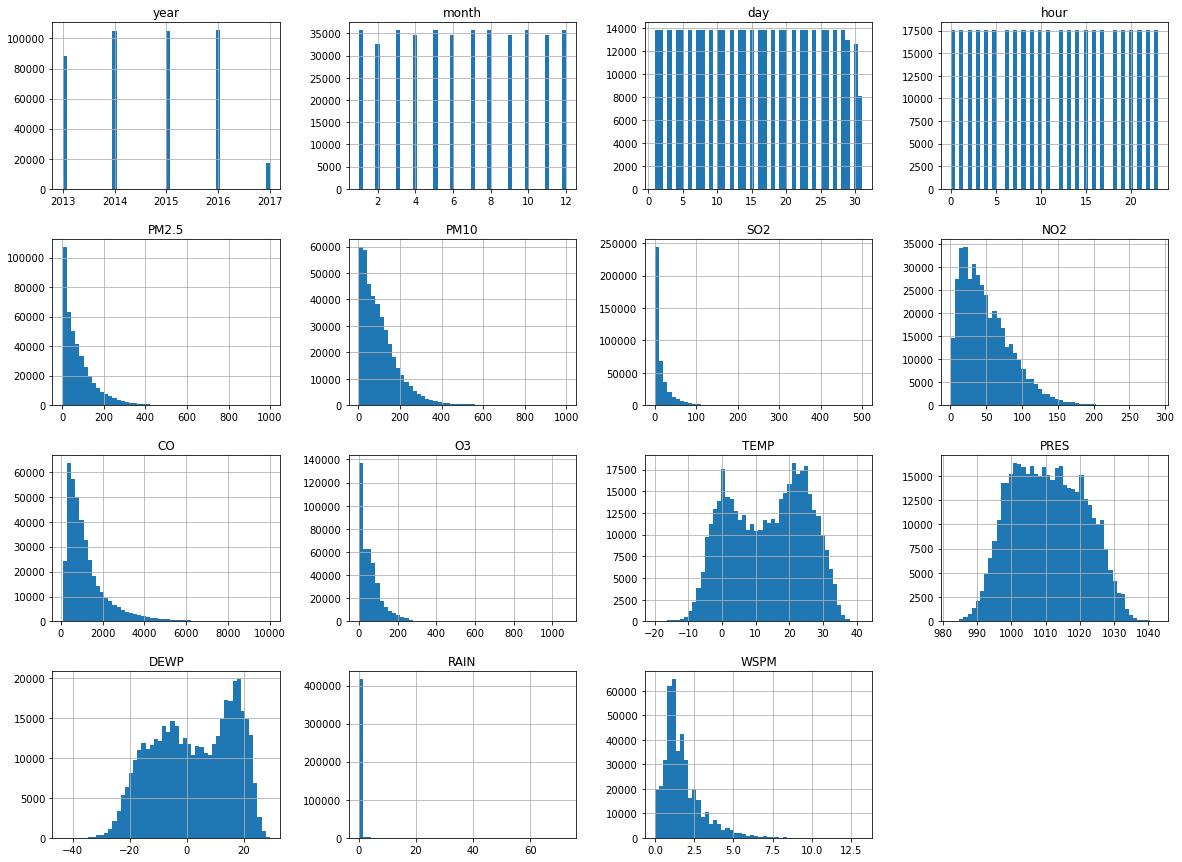

In [ ]:
import matplotlib.pyplot as plt
#plot the histogram to see the pattern of each variable (normally distributed?)
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots_all")
plt.show()

* The 6 atmospheric variables follows exponential reduction pattern
* Temperature, Pressure, and Dewpoint follows normal distribution
* WSPM (wind speed (m/s)) follows a skewed normal distribution.
* Rain (rainfall intensity) is unclear.

### Outlier Analysis

<AxesSubplot:>

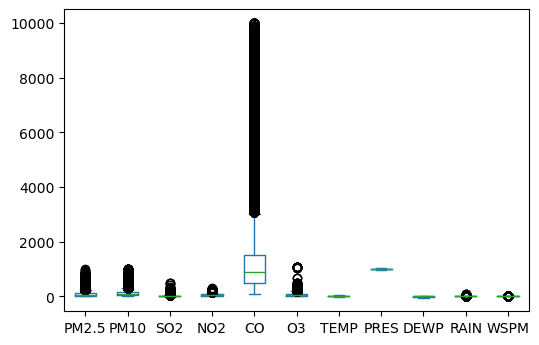

In [ ]:
#outlier analysis using boxplot from pandas
df2 = df.select_dtypes(exclude='object').copy()
df2.drop(['month','day','year','hour'],axis=1,inplace=True)
df2.plot(kind='box')

<AxesSubplot:>

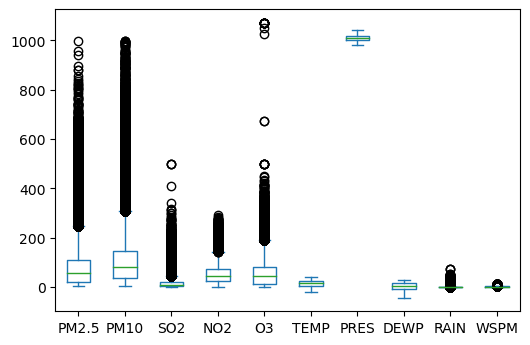

In [ ]:
# drop the CO column since scale is different
df2.drop(['CO'], axis=1, inplace=True)
df2.plot(kind='box')

Since CO2 column has a lot of null values and outlier, will preprocess the CO2 column first by deleting null values. Then evaluate null values again. We have a lot of dataset and the requirements is 10,000 records. So we will delete null values instead of imputting values to work with real data only.  

Also, there are a lot of outlier (higher value in the pollutants column and RAIN as well as WSPM (windspeed). Will need to perform outlier removal on those variables in the preprocessing

### Yearly analysis

Use sns.pointplot to do the analysis. Per documentation: A point plot represents an estimate of **central tendency for a numeric variable** by the position of the dot and provides some indication of the uncertainty around that estimate using **error bars**.

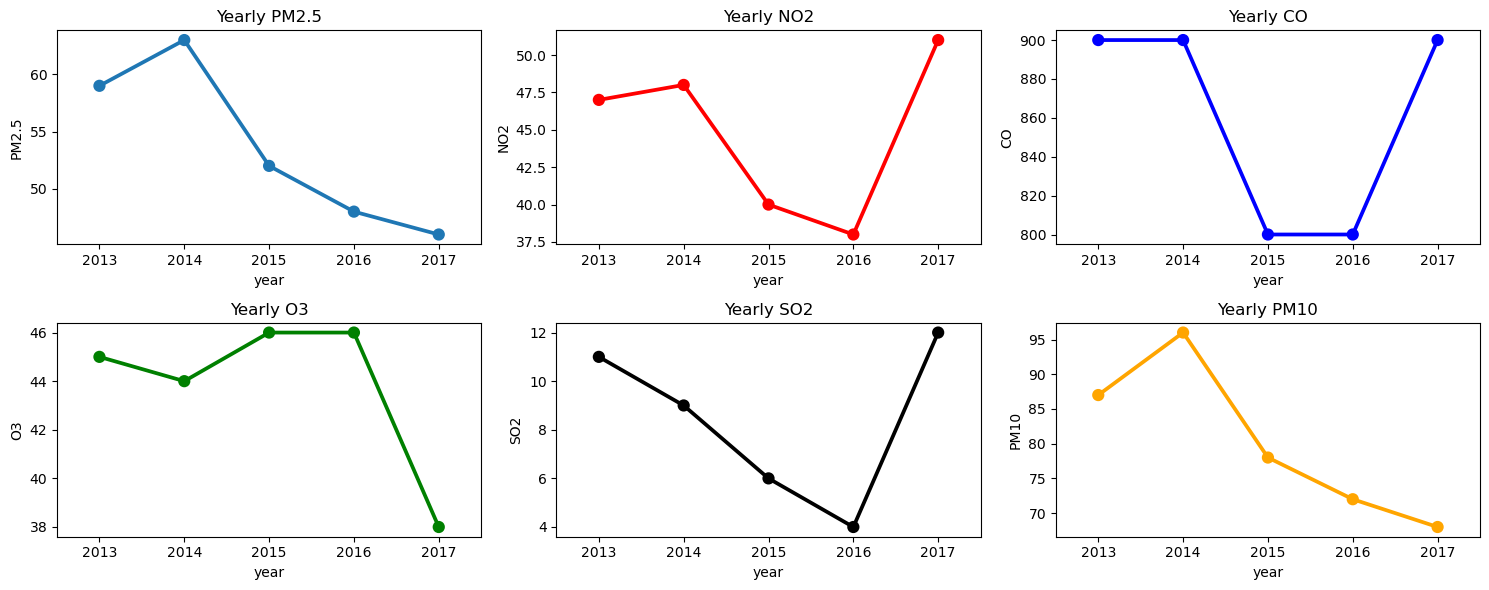

In [ ]:
#yearly analysis for air pollutants using median values

df3 = df[['PM2.5','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
fig,ax=plt.subplots(2, 3,figsize=(15,6))
ax[0, 0].set_title('Yearly PM2.5')
sns.pointplot(ax= ax[0,0],x='year', y='PM2.5', data=df3)

df3 = df[['NO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[0, 1].set_title('Yearly NO2')
sns.pointplot(ax= ax[0,1], x='year', y='NO2', data=df3,markers='o', color='red')

df3 = df[['CO','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[0, 2].set_title('Yearly CO')
sns.pointplot(ax= ax[0,2],x='year', y='CO', data=df3,markers='o', color='blue')

df3 = df[['O3','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 0].set_title('Yearly O3')
sns.pointplot(ax=ax[1, 0], x='year', y='O3', data=df3,markers='o', color='green')


df3 = df[['SO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 1].set_title('Yearly SO2')
sns.pointplot(ax=ax[1, 1],x='year', y='SO2', data=df3,markers='o', color='black')


df3 = df[['PM10','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
ax[1, 2].set_title('Yearly PM10')
sns.pointplot(ax=ax[1,2], x='year', y='PM10', data=df3,markers='o', color='orange')
fig.tight_layout()

From the graph:
* The yearly PM2.5 and PM10 have the same shape and decreasing over the span of 5 years as suggested by the paper. PM10 is a strong correlated feature with PM2.5. We might want to do the model without PM10 to see if we can get a regression model of PM in general. 
* The yearly NO2 and SO2 have very similar trend and graph shape. This is expected as they are both gas particles and resulted from similar source of air pollution. 
* The yearly CO also kind of similar to NO2 and SO2 but the sudden drop in 2015 is a bit unusual (suspicious). If this is not an important feature for our regression model, it might be best to delete this feature.
* O3 also has a sudden drop at 2017 from the previous 2 years increase. 

### Monthly analysis

Monthly pollutants mean (2013 - 2017)


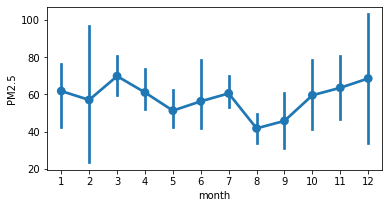

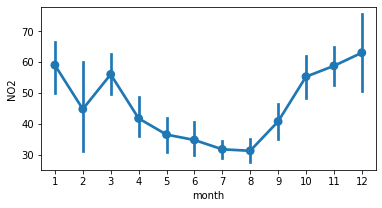

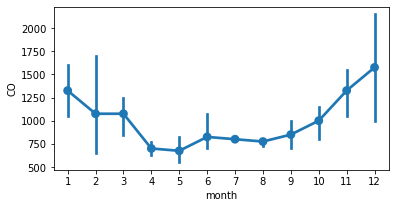

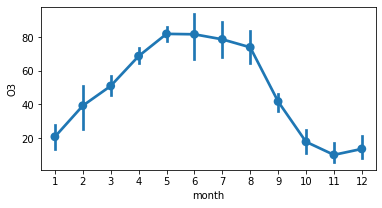

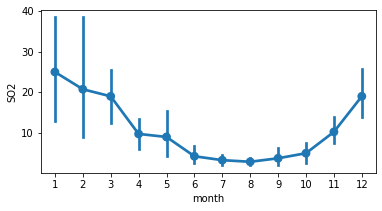

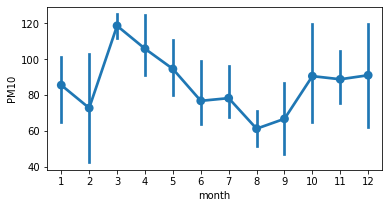

In [ ]:
#create loop to shorten code

pollutants = ['PM2.5', 'NO2', 'CO', 'O3', 'SO2', 'PM10']
print('Monthly pollutants mean (2013 - 2017)')

for i in pollutants:    
    temp = df[[i, 'month', 'year', 'station']].groupby(['year', 
                'month']).median().reset_index().sort_values(by=['year','month'], ascending=True)
    fig, ax=plt.subplots(figsize=(6, 3))
    sns.pointplot(x='month', y=i, data=temp) 
    ax.set(xlabel='month', ylabel=i)

From the monthly analysis above:
* PM2.5 are pretty stable throughout different season
* NO2, CO, and SO2 median values are lower during warmer months (May (5) to September (9))
* O3 has the opposite trend with other pollutants with higher value during warmer months.
* PM10 has sharper peaks and valleys compare to PM2.5 even though the yearly analysis is almost identical.

### Hourly analysis

Hourly pollutants median from 2013 - 2017


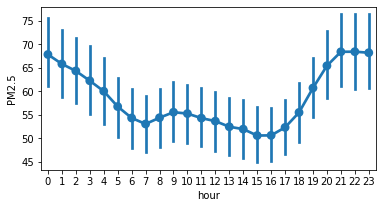

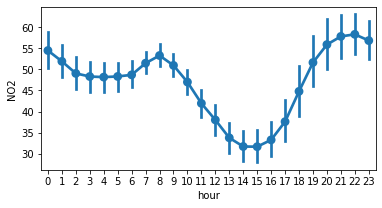

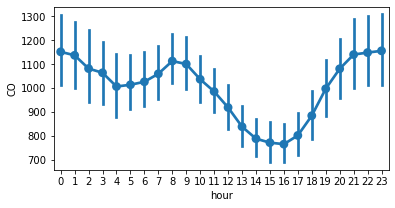

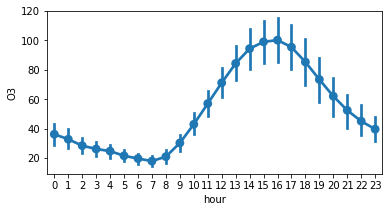

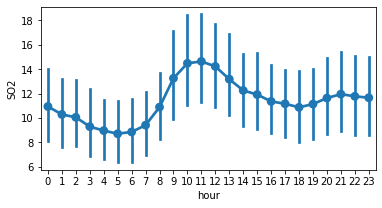

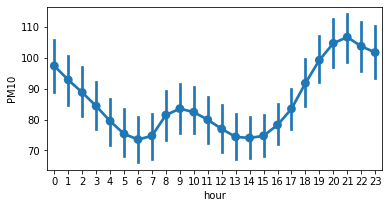

In [ ]:
#create loop to shorten code

pollutants = ['PM2.5', 'NO2', 'CO', 'O3', 'SO2', 'PM10']
print('Hourly pollutants median from 2013 - 2017')

for i in pollutants:    
    temp = df[[i, 'hour', 'month', 'year', 'station']].groupby(['year', 'month', 'hour'
              ]).median().reset_index().sort_values(by=['year', 'month', 'hour'], ascending=False)
    fig, ax=plt.subplots(figsize=(6, 3))
    sns.pointplot(x='hour', y=i, data=temp) 
    ax.set(xlabel='hour', ylabel=i)

From the hourly analysis above:
* PM2.5 and PM10 follows diurnal pattern with lesser pollutans during the daytime (5AM - 5PM) compare to night time. This is interesting since one might assume more pollutants occuring during daytime activity.
* NO2 and CO are higher overnight and early business hour (before 12PM)
* SO2 is highest during mid-day time (after morning traffic rush hour where a lot of transportation exhaust?)
* From the error bars, we can see that NO2 and O3 has the lowest one

## Correlation heatmap

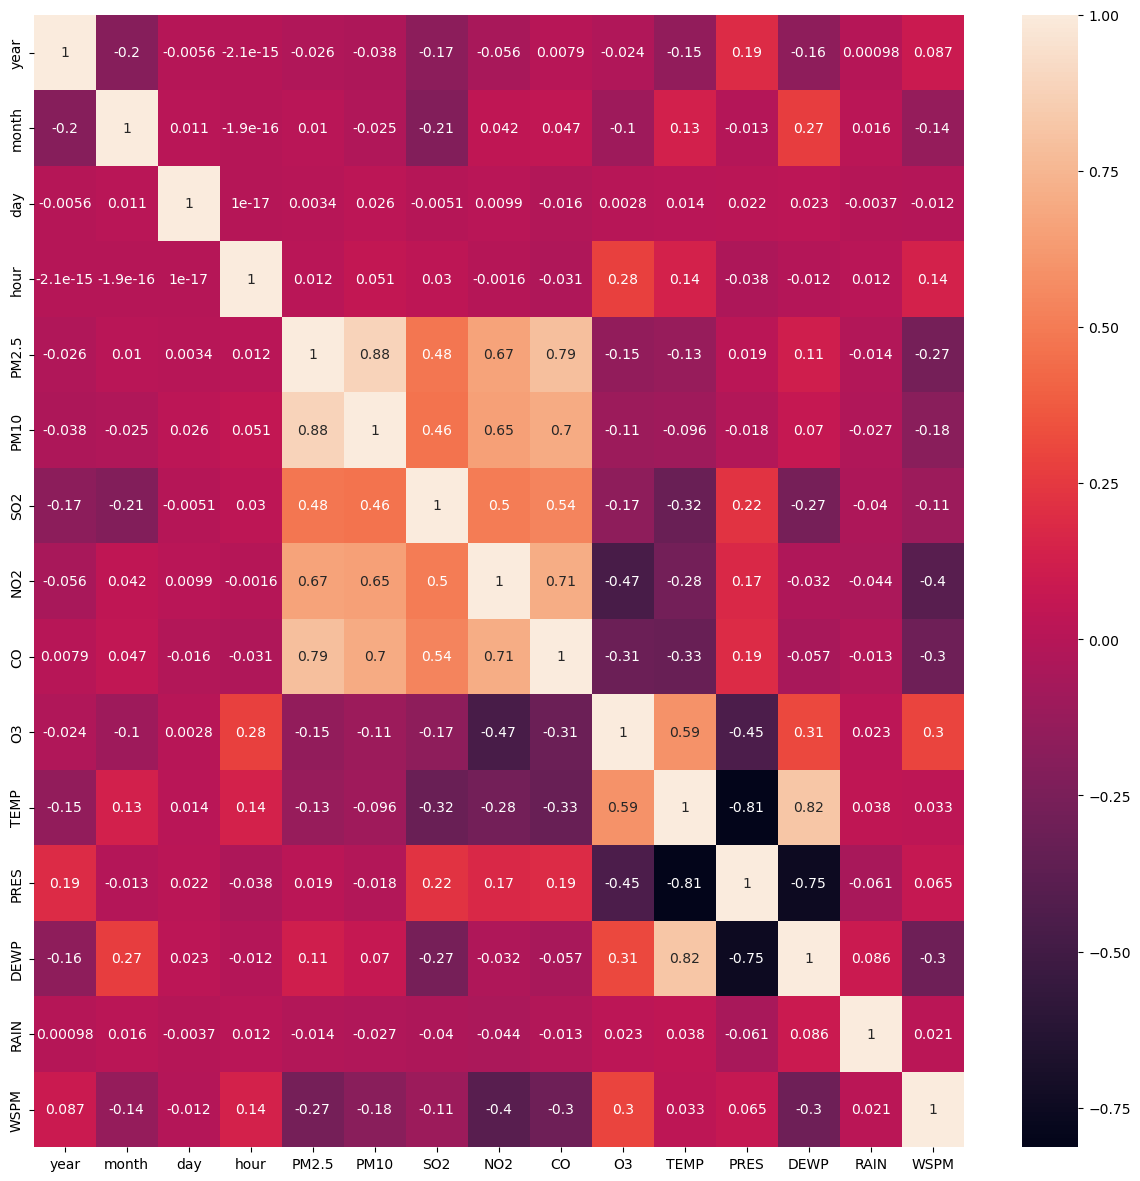

In [ ]:
# pd.corr() --> find the pairwise correlation of all columns in the dataframe.
  #Automatically exclude NA and any non-numeric columns 

fig,ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(df.corr(), annot=True,ax=ax)
plt.show()

There is strong correlation between PM2.5 and PM10 as PM2.5 is part of PM10. PM10 variable might need to be remove before regression analysis to truely predict PM2.5 only from other independent variables (as mentioned above). 

There is moderate positive correlation between PM2.5 and CO as well as NO. There is weak positive correlation between PM2.5 and SO2. There is very low correlation between PM2.5 with the atmospheric data. 

There is also moderate positive correlation between NO and CO. These two values might be repetitive in predicting PM2.5 values (we might be able to drop CO as predicted above). 

There is strong negative correlation between air temperature and pressure (as expected), and strong positive correlation between temperature and dew point (as expected). 

C:\Users\jtanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


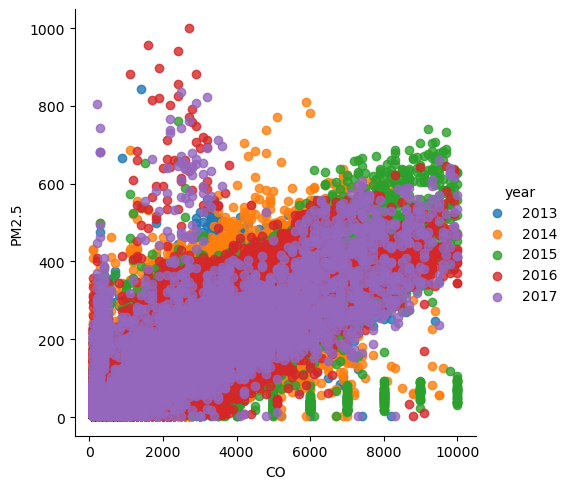

In [ ]:
#check relationship between CO and PM2.5 accross YEAR
sns.lmplot('CO', 'PM2.5', data=df, hue='year', fit_reg=False)
plt.show()

# Preprocessing

From Checkpoint 3 (11/20/22): 
You have to complete the following milestone for your project

 1. Train and test multiple models you learned in this course

 2. All the models should be custom written as you produced in your homework

 3. Explain why do you choose each of the models, and what did you learn from this model through training and test datasets? Explain all the models with accuracy, important features, etc

 4. Recommend your model for the business

While you provide the milestone make sure this should be an incremental version of the previous milestone document. Here is the expected sections on the document:
* Introduction
* Problem statement
* Dataset
* EDA
* Model Training and evaluation
* Model selection

## Null values removal

As described above, we have more sample number than required so we will remove null values instead of imputing values to avoid skew. Other alternative are (not used) filling missing data (fillna): according to the month's mean/median for numerical type, according to station location for object data (wind direction), etc.

In [ ]:
df4 = df.copy()

#drop all rows containing missing values
df4.dropna(axis='index', how='any', inplace=True)
df4

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [ ]:
#Check the amount of NULL (missing) values in each column after removal
df4.isnull().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Outlier Removal?

Will perform outlier removal if the model performance metrics are not good. 

After modeling: outlier is not removed as the accuracy result is pretty good.

## Convert "object" dtype variables

Convert object type data to categorical starting from 0

In [ ]:
# check unique values for each columns with 'object' dtypes
for col in df4.select_dtypes(include='object').columns:
    print(col)
    print(df4[col].unique())

wd
['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW']
station
['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']


In [ ]:
#Assign the wind direction and station to numerical
    #can use pd.dummies but will create a lot of dummy columns :(
    #can use LabelEncoder from sklearn.preprocessing but avoid additional libraries
df5 = df4.copy()
    
wd_dict = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'ENE':4, 'E':5, 'NE':6, 'W':7, 'SSW':8, 
           'WSW':9, 'SE':10, 'WNW':11, 'SSE':12, 'ESE':13, 'S':14, 'SW':15}

df5.wd.replace(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE', 'WNW', 
                'SSE', 'ESE', 'S', 'SW'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], inplace=True)

station_dict ={'Aotizhongxin':0, 'Changping':1, 'Dingling':2, 'Dongsi':3, 'Guanyuan':4, 'Gucheng':5,
               'Huairou':6, 'Nongzhanguan':7, 'Shunyi':8, 'Tiantan':9, 'Wanliu':10, 'Wanshouxigong':11}

df5.station.replace(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng','Huairou', 
                'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'], 
               [0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)
df5

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,0,4.4,0
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,1,4.7,0
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,0,5.6,0
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,2,3.1,0
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,2,2.4,11
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,11,0.9,11
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,2,1.1,11
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,0,1.2,11


In [ ]:
#label for wind direction
wd_dict

{'NNW': 0,
 'N': 1,
 'NW': 2,
 'NNE': 3,
 'ENE': 4,
 'E': 5,
 'NE': 6,
 'W': 7,
 'SSW': 8,
 'WSW': 9,
 'SE': 10,
 'WNW': 11,
 'SSE': 12,
 'ESE': 13,
 'S': 14,
 'SW': 15}

In [ ]:
#label for station
station_dict

{'Aotizhongxin': 0,
 'Changping': 1,
 'Dingling': 2,
 'Dongsi': 3,
 'Guanyuan': 4,
 'Gucheng': 5,
 'Huairou': 6,
 'Nongzhanguan': 7,
 'Shunyi': 8,
 'Tiantan': 9,
 'Wanliu': 10,
 'Wanshouxigong': 11}

## Split test and train

Several test and train data is created as more complex model require higher computation time and memory. Test and train data included:
* Full preprocessed df
* 10% of full df
* 1% of full df
* 10% of df without "PM10" (highest correlation with "PM2.5") 

### FULL data: test train split

In [ ]:
#locate dependent and independent variables
df6 = df5.sample(frac = 1, random_state=40) #reshuffle to get more distributed split, use seed to be reproducible

X = df6.drop(['PM2.5'], axis =1).values #iloc[:, 2:].values #use all features first
Y = df6['PM2.5'].values #.reshape(-1,1) #reshape depending on model

print("Shape of X:",X.shape)
print("Shape of Y:",Y.shape)

Shape of X: (382168, 16)
Shape of Y: (382168,)


In [ ]:
#FOR Non-standardized data: split train and test data set 80-20

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)
    # include random state so result is similar every run
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)

Shape of X_train: (305734, 16)
Shape of X_test: (76434, 16)


In [ ]:
#Standardize dataset for error-based analysis (Lasso, SVM, KNN, etc) using sklearn standardscaler

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)

print(f"X_train_std mean: ", X_train_std.mean())
print(f"X_train_std standard deviation: ", X_train_std.std())
#confirm that mean =0 and std deviation =1

X_train_std mean:  -5.90933208589765e-14
X_train_std standard deviation:  1.0000000000001912


### 10% FULL data: test train split

For more complex model, use this 10% data first to compare results since there is memory error (e.g. at KNN) and high computational time for decision tree based model.

In [ ]:
#reshuffle to get more distributed split
#frac = 0.1 means 10% of original data
df6_10 = df5.sample(frac = 0.1, random_state=40) 
df6_10.shape

(38217, 17)

In [ ]:
#locate dependent and independent variables (1% sample)

X2a = df6_10.drop(['PM2.5'], axis =1).values 
Y2a = df6_10['PM2.5'].values #.reshape(-1,1) #reshape depending on model

print("Shape of X2a:",X2a.shape)
print("Shape of Y2a:",Y2a.shape)

Shape of X2a: (38217, 16)
Shape of Y2a: (38217,)


In [ ]:
#FOR Non-standardized data: split train and test data set 80-20

from sklearn.model_selection import train_test_split
X_train2a, X_test2a, Y_train2a, Y_test2a = train_test_split(X2a, Y2a, test_size=.2, random_state=41)
    # include random state so result is similar every run
print("Shape of X_train2a:",X_train2a.shape)
print("Shape of X_test2a:",X_test2a.shape)

Shape of X_train2a: (30573, 16)
Shape of X_test2a: (7644, 16)


In [ ]:
#Standardize dataset for error-based analysis (Lasso, SVM, KNN, etc) using sklearn standardscaler

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_std2a = sc_x.fit_transform(X_train2a)
X_test_std2a = sc_x.transform(X_test2a)

print(f"X_train_std2a mean: ", X_train_std2a.mean())
print(f"X_train_std2a standard deviation: ", X_train_std2a.std())
#confirm that mean =0 and std deviation =1

X_train_std2a mean:  4.130830008635077e-14
X_train_std2a standard deviation:  0.9999999999999996


### 1% FULL data: test train split

For KNN since getting memory error (also RF and GB). tried with 10% data but still got error.

In [ ]:
#reshuffle to get more distributed split
#frac = 0.01 means 1% of original data
df6_1 = df5.sample(frac = 0.01, random_state=43) 
df6_1.shape

(3822, 17)

In [ ]:
#locate dependent and independent variables (1% sample)

X2 = df6_1.drop(['PM2.5'], axis =1).values 
Y2 = df6_1['PM2.5'].values #.reshape(-1,1) #reshape depending on model

print("Shape of X2:",X2.shape)
print("Shape of Y2:",Y2.shape)

Shape of X2: (3822, 16)
Shape of Y2: (3822,)


In [ ]:
#FOR Non-standardized data: split train and test data set 80-20

from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=.2, random_state=41)
    # include random state so result is similar every run
print("Shape of X_train2:",X_train2.shape)
print("Shape of X_test2:",X_test2.shape)

Shape of X_train2: (3057, 16)
Shape of X_test2: (765, 16)


In [ ]:
#Standardize dataset for error-based analysis (Lasso, SVM, KNN, etc) using sklearn standardscaler

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_std2 = sc_x.fit_transform(X_train2)
X_test_std2 = sc_x.transform(X_test2)

print(f"X_train_std mean: ", X_train_std2.mean())
print(f"X_train_std standard deviation: ", X_train_std2.std())
#confirm that mean =0 and std deviation =1

X_train_std mean:  -1.2330484832212402e-14
X_train_std standard deviation:  0.9999999999999982


### Without PM10, 10% data: test train split

Since PM10 has high correlation with PM2.5 (PM2.5 is part of PM10), drop this feature to see if the model still can predict the PM2.5 well. Only 10% of data is used to reduce computational time and memory.

In [ ]:
df7 = df5.sample(frac =0.1, random_state=42)

df7 = df7.drop(columns=['PM10'])
df7

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
10477,2014,5,11,13,12.0,3.0,22.0,900.0,90.0,12.800,998.70,11.7,0.5,3,1.2,0
136581,2016,9,28,21,36.0,2.0,91.0,700.0,2.0,14.175,1019.25,2.6,0.0,15,0.8,3
23213,2015,10,24,5,76.0,2.0,63.0,1400.0,2.0,9.800,1016.20,8.9,0.0,1,1.4,0
59699,2015,12,22,11,204.0,44.0,94.0,4000.0,3.0,0.000,1020.20,-5.4,0.0,15,1.0,1
343269,2016,4,27,21,91.0,3.0,63.0,1100.0,48.0,16.200,1009.00,10.5,0.0,11,0.5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48534,2014,9,13,6,85.0,2.0,47.0,900.0,2.0,18.700,1006.60,15.8,0.0,0,1.1,1
153619,2014,9,8,19,15.0,4.0,38.0,400.0,107.0,24.100,1003.00,9.3,0.0,9,1.8,4
109774,2013,9,7,22,99.0,6.0,93.0,1500.0,78.0,18.800,1013.60,17.6,0.0,4,0.6,3
235191,2015,12,29,15,195.0,35.0,78.0,1900.0,14.0,2.800,1016.60,-7.7,0.0,9,1.4,6


In [ ]:
#select dependent and independent for data without PM10
X0 = df7.drop(['PM2.5'], axis =1).values 
Y0 = df7['PM2.5'].values #.reshape(-1,1) #reshape depending on model

print("Shape of X0:",X0.shape)
print("Shape of Y0:",Y0.shape)

Shape of X0: (38217, 15)
Shape of Y0: (38217,)


In [ ]:
#FOR Non-standardized data: split train and test data set 80-20

from sklearn.model_selection import train_test_split
X_train0, X_test0, Y_train0, Y_test0 = train_test_split(X0, Y0, test_size=.2, random_state=41)
    # include random state so result is similar every run
print("Shape of X_train0:",X_train0.shape)
print("Shape of X_test0:",X_test0.shape)

Shape of X_train0: (30573, 15)
Shape of X_test0: (7644, 15)


In [ ]:
#Standardize dataset for error-based analysis (Lasso, SVM, KNN, etc) using sklearn standardscaler

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_std0 = sc_x.fit_transform(X_train0)
X_test_std0 = sc_x.transform(X_test0)

print(f"X_train_std mean: ", X_train_std0.mean())
print(f"X_train_std standard deviation: ", X_train_std0.std())
#confirm that mean =0 and std deviation =1

X_train_std mean:  -3.2579901675246467e-14
X_train_std standard deviation:  1.0000000000000318


# Model Training and Evaluation - all features

Select a few model to train the preprocessed dataset above:
* Linear Regression (gradient descent optimizer)
* Lasso regression to select important features (low computation)
* Decision Tree (slightly higher computation)
* Bagging: Random Forest (high computation)
* KNN (low computation, need high memory if dataset is large)

## Linear Regression

Will use the custom Linear Regression from HW3 as a baseline

In [ ]:
## import ##

#Custom linear regressor
from statmodels.regression import LinearRegression

In [ ]:
#Train the model: linear regression
    #default optimizer is Batch Gradient Descent (unchanged)
    #default hyperparameter: n_iter=1000, lr=1e-2, alpha=1.0 (changed alpha)

#record the time
import time
start_time = time.time()

linearModel = LinearRegression(n_iter=1000, lr=0.05, solver='bgd') #lr=0.05 is slightly better
    #use batch gradient descent optimizer
linearModel.fit(X_train_std, Y_train) 
print("Linear model cofficients :",linearModel.coef_)
print("--- %s seconds ---" % (time.time() - start_time))

Linear model cofficients : [ 7.95099573e+01  6.49361001e-01 -1.55015519e+00 -9.45632136e-01
 -2.93817053e-01  4.96128328e+01  2.84424220e+00  2.67530942e+00
  2.33692155e+01  5.81510448e+00 -1.24331498e+01  4.21894308e+00
  1.99435199e+01 -4.02363520e-01 -7.34861083e-02 -6.38122301e-01
 -8.24282359e-01]
--- 7.624220848083496 seconds ---


In [ ]:
#predict the train dataset
y_pred_tr_linear = linearModel.predict(X_train_std)

#train data performance metrics
from sklearn.metrics import mean_squared_error, r2_score 

#RMSE (squared=False returns rmse)
rmse_linear_tr = round(mean_squared_error(Y_train, y_pred_tr_linear, squared=False),4) 
#R2
r2_linear_tr = round(r2_score(Y_train, y_pred_tr_linear), 4)
print('Linear Regression, train - Root Mean Squared Error (RMSE):', rmse_linear_tr)
print('Linear Regression, train - R-Squared:', r2_linear_tr)

Linear Regression, train - Root Mean Squared Error (RMSE): 30.4902
Linear Regression, train - R-Squared: 0.8561


In [ ]:
#predict the test dataset
y_pred_linear = linearModel.predict(X_test_std)

#test data performance metrics
#RMSE (squared=False returns rmse)
rmse_linear = round(mean_squared_error(Y_test, y_pred_linear, squared=False),4) 
#R2
r2_linear = round(r2_score(Y_test, y_pred_linear), 4)
print('Linear Regression, test - Root Mean Squared Error (RMSE):', rmse_linear)
print('Linear Regression, test - R-Squared:', r2_linear)

Linear Regression, test - Root Mean Squared Error (RMSE): 30.1671
Linear Regression, test - R-Squared: 0.8552


In [ ]:
df6['PM2.5'].describe()

count    382168.000000
mean         79.432383
std          80.154901
min           2.000000
25%          20.000000
50%          55.000000
75%         111.000000
max         844.000000
Name: PM2.5, dtype: float64

### Linear Model evaluation & feature importance

The regular custom linear regression (from statmodel) with gradient batch descent successfully train and predict the full dataset. The $R^2$ for both train and test dataset is quite good ~0.85. It is indicative that the model is not overfitting and have relatively low bias + low variance. 

The RMSE or root mean squared error is also similar for train and test data (~30 ppm). This value is well below the standard deviation and acceptable rmse for the model. 

This linear model result will be used as a baseline for comparing other models. 

The feature importance list are obtained from the list of coefficient of the features. The feature 'year', 'SO2', and 'O3' are the top important features (highest linear model coefficient). This findings does not support the visualization found above though. Will be compared with the lasso regression result next.

In [ ]:
features_name = df6.drop(['PM2.5'], axis =1).columns

In [ ]:
df_lm_coef = pd.DataFrame(list(zip(features_name, linearModel.coef_)),
                          columns =['Features', 'Importance_LM'])
df_lm_coef = df_lm_coef.sort_values(by=['Importance_LM'], ascending=False)
df_lm_coef

,Features,Importance_LM
0,year,79.509957
5,SO2,49.612833
8,O3,23.369215
12,RAIN,19.943520
9,TEMP,5.815104
11,DEWP,4.218943
6,NO2,2.844242
7,CO,2.675309
1,month,0.649361
14,WSPM,-0.073486


## Lasso Regression

Lasso implies L1 penalty to the Linear Regression. It has alpha parameter that is multiplied to the weights of each features/independent variables. More important features will have higher weights than the one that does not. Hence, it is predicted that the lasso regression will improve the performance metrics of the model.

In [ ]:
#import custom code from statmodels used in HW 7

from statmodels.regression import LassoRegression

#Find performance
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Train the model: lasso regression
    #default optimizer is Batch Gradient Descent (unchanged)
    #default hyperparameter: n_iter=1000, lr=1e-2, alpha=1.0 (changed alpha)

#record the time
import time
start_time = time.time()

lassoModel = LassoRegression(lr=0.05, alpha=0.1) #use same lr as LM, initiate alpha = 0.1 first
lassoModel.fit(X_train_std, Y_train) 
print("Lasso model cofficients :",lassoModel.coef_)
print("--- %s seconds ---" % (time.time() - start_time))

Lasso model cofficients : [ 7.95099573e+01  6.13736780e-01 -1.47076189e+00 -8.84664886e-01
 -2.48192314e-01  4.96231035e+01  2.79103523e+00  2.55342196e+00
  2.34777189e+01  5.53579961e+00 -1.19444757e+01  4.05260391e+00
  1.93809481e+01 -3.31664445e-01 -7.06250279e-03 -6.87162094e-01
 -7.62755307e-01]
--- 7.683102130889893 seconds ---


In [ ]:
#train data performance metrics

from sklearn.metrics import mean_squared_error, r2_score 

y_pred_tr_lasso = lassoModel.predict(X_train_std)

#RMSE (squared=False returns rmse)
rmse_lasso_tr = round(mean_squared_error(Y_train, y_pred_tr_lasso, squared=False),4) 
#R2
r2_lasso_tr = round(r2_score(Y_train, y_pred_tr_lasso), 4)
print('Lasso Regression, train - Root Mean Squared Error (RMSE):', rmse_lasso_tr)
print('Lasso Regression, train - R-Squared:', r2_lasso_tr)

Lasso Regression, train - Root Mean Squared Error (RMSE): 30.4918
Lasso Regression, train - R-Squared: 0.8561


In [ ]:
#test data performance metrics

#record the time
import time
start_time = time.time()
y_pred_lasso = lassoModel.predict(X_test_std)
print("--- %s seconds ---" % (time.time() - start_time))

#RMSE (squared=False returns rmse)
rmse_lasso = round(mean_squared_error(Y_test, y_pred_lasso, squared=False),4) 
#R2
r2_lasso = round(r2_score(Y_test, y_pred_lasso), 4)
print('Lasso Regression test data - Root Mean Squared Error (RMSE):', rmse_lasso)
print('Lasso Regression test data - R-Squared:', r2_lasso)

--- 0.0 seconds ---
Lasso Regression test data - Root Mean Squared Error (RMSE): 30.1697
Lasso Regression test data - R-Squared: 0.8551


### Lasso Model Evaluation & Feature Importance

The $R^2$ value for the train lasso is pretty good at 0.8557 and the test dataset is very close at 0.8565. There is no overfitting in this model. Both the $R^2$  and RMSE value are very similar to the linear model above. The lasso regularization does not really improve the linear model performance. 
* Tried to reduce the learning rate but it actually makes accuracy slightly worse (0.80)
* Tried to increase and decrease alpha (between 0.001 -0.5) but not much changed in accuracy.

In [ ]:
#use df6 column
lassoImportantfeatures = pd.DataFrame(data={'Features': df6.drop(['PM2.5'], axis =1).columns})
lassoImportantfeatures["Importance_LR"] = pd.DataFrame(lassoModel.coef_[1:])
lassoImportantfeatures = lassoImportantfeatures.sort_values(by='Importance_LR', ascending=False)
lassoImportantfeatures

,Features,Importance_LR
4,PM10,49.623104
7,CO,23.477719
11,DEWP,19.380948
8,O3,5.535800
10,PRES,4.052604
5,SO2,2.791035
6,NO2,2.553422
0,year,0.613737
13,wd,-0.007063
3,hour,-0.248192


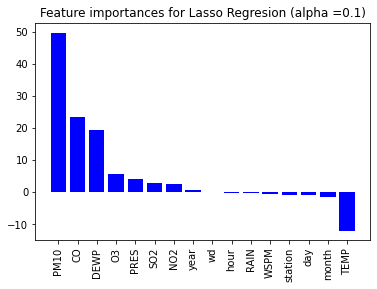

In [ ]:
plt.bar(x=lassoImportantfeatures['Features'], height=lassoImportantfeatures['Importance'], color='blue')
plt.title('Feature importances for Lasso Regresion (alpha =0.1)')
plt.xticks(rotation='vertical')
plt.show()

Most of variance explained by PM10 (as expected), followed by CO (carbon dioxide) and DEWP (dewpoint).

The importance indicates the coefficient of each features. The higher the coefficient is, the more contribution that feature is to the model (predicting y). Therefore, PM10, CO, and DEWP contributes more to the prediction than the rest. The following 2 features (O3 and PRES) are relatively similar in importance. 

Most of the important features are the other pollutants in the air. This shows how important it is to get a correct reading of the other pollutants in the air. 

Interestingly, temperature has the lowest importance on the PM2.5 value. One would think that the human activity producing pollutants will be more when the temperature is higher. 

We can eliminate the features with importance <0 for the next model type to reduce computation time.

**IF NEED TO SELECT FEATURES**

In [ ]:
#non-negative coefficients
top_8 = lassoImportantfeatures['Features'].head(8)
top_8.to_numpy()

array(['PM10', 'CO', 'DEWP', 'O3', 'PRES', 'NO2', 'SO2', 'year'],
      dtype=object)

In [ ]:
#reduce unimportant features
    #from Lasso Regression below: top 8 important features are:
df6_10a = df6_10[['PM2.5','PM10', 'CO', 'DEWP', 'O3', 'PRES', 'NO2', 'SO2', 'year']]
df6_10a

,PM2.5,PM10,CO,DEWP,O3,PRES,NO2,SO2,year
314768,242.0,242.0,5400.0,-9.1,3.0,1017.0,81.0,26.0,2017
410926,168.0,203.0,2800.0,-9.6,6.0,1015.4,99.0,72.0,2016
398249,40.0,47.0,800.0,20.3,179.0,999.2,34.0,3.0,2014
255577,37.0,69.0,700.0,9.9,17.0,1016.8,72.0,2.0,2014
149977,124.0,403.0,1700.0,3.7,55.0,1015.2,55.0,39.0,2014
...,...,...,...,...,...,...,...,...,...
65579,82.0,105.0,1200.0,22.0,87.0,998.7,44.0,3.0,2016
244883,25.0,43.0,700.0,-15.2,61.0,1013.6,27.0,7.0,2017
254,114.0,151.0,1100.0,-7.5,84.0,1010.9,80.0,99.0,2013
227182,6.0,15.0,300.0,-21.6,71.0,1025.0,7.0,2.0,2015


### Use 10% of sampled df

In [ ]:
#Train the model: lasso regression
    #default optimizer is Batch Gradient Descent (unchanged)
    #default hyperparameter: n_iter=1000, lr=1e-2, alpha=1.0 (changed alpha)

#record the time
import time
start_time = time.time()

lassoModel2 = LassoRegression(lr=1e-2, alpha=0.1) #initiate alpha = 0.1 first
lassoModel2.fit(X_train_std2a, Y_train2a) 
print("Lasso model cofficients :",lassoModel2.coef_)
print("--- %s seconds ---" % (time.time() - start_time))

Lasso model cofficients : [ 7.92557680e+01  7.36514282e-01 -1.33319055e+00 -7.79495994e-01
 -4.95639874e-01  5.03555041e+01  2.73055982e+00  2.54382368e+00
  2.37635892e+01  5.23555936e+00 -9.56838293e+00  4.20267875e+00
  1.73995951e+01 -8.00383878e-04  1.55259926e-02 -9.89161634e-01
 -8.90672698e-01]
--- 0.25475192070007324 seconds ---


In [ ]:
#train data performance metrics
from sklearn.metrics import mean_squared_error, r2_score 

y_pred_tr_lasso2 = lassoModel2.predict(X_train_std2a)

#RMSE (squared=False returns rmse)
rmse_lasso_tr2 = round(mean_squared_error(Y_train2a, y_pred_tr_lasso2, squared=False),4) 
#R2
r2_lasso_tr2 = round(r2_score(Y_train2a, y_pred_tr_lasso2), 4)
print('Lasso Regression (10%), train - Root Mean Squared Error (RMSE):', rmse_lasso_tr2)
print('Lasso Regression (10%), train - R-Squared:', r2_lasso_tr2)

Lasso Regression (10%), train - Root Mean Squared Error (RMSE): 30.6266
Lasso Regression (10%), train - R-Squared: 0.8571


In [ ]:
df6_10['PM2.5'].describe()

count    38217.000000
mean        79.609514
std         81.321409
min          2.000000
25%         20.000000
50%         54.000000
75%        110.000000
max        770.000000
Name: PM2.5, dtype: float64

In [ ]:
#test data performance metrics

#record the time
import time
start_time = time.time()
y_pred_lasso2 = lassoModel2.predict(X_test_std2a)
print("--- %s seconds ---" % (time.time() - start_time))

#RMSE (squared=False returns rmse)
rmse_lasso2 = round(mean_squared_error(Y_test2a, y_pred_lasso2, squared=False),4) 
#R2
r2_lasso2 = round(r2_score(Y_test2a, y_pred_lasso2), 4)
print('Lasso Regression (10%) test data - Root Mean Squared Error (RMSE):', rmse_lasso2)
print('Lasso Regression (10%) test data - R-Squared:', r2_lasso2)

--- 0.009845495223999023 seconds ---
Lasso Regression (10%) test data - Root Mean Squared Error (RMSE): 31.4988
Lasso Regression (10%) test data - R-Squared: 0.8542


In [ ]:
#use df6b column
lassoImportantfeatures2 = pd.DataFrame(data={'Features': df6_10.drop(['PM2.5'], axis =1).columns})
lassoImportantfeatures2["Importance"] = pd.DataFrame(lassoModel2.coef_[1:])
lassoImportantfeatures2 = lassoImportantfeatures2.sort_values(by='Importance', ascending=False)
lassoImportantfeatures2

,Features,Importance
4,PM10,50.355504
7,CO,23.763589
11,DEWP,17.399595
8,O3,5.235559
10,PRES,4.202679
5,SO2,2.730560
6,NO2,2.543824
0,year,0.736514
13,wd,0.015526
12,RAIN,-0.000800


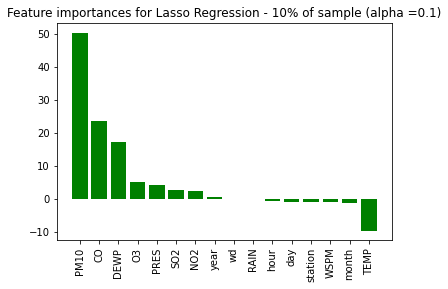

In [ ]:
plt.bar(x=lassoImportantfeatures2['Features'], height=lassoImportantfeatures2['Importance'], color='green')
plt.title('Feature importances for Lasso Regression - 10% of sample (alpha =0.1)')
plt.xticks(rotation='vertical')
plt.show()

### Summary of 100% vs 10% data:
The top important features is the same even though we run with 10% of sample amount (~38k). The accuracy and RMSE are also very similar. Therefore, central tendency theorem holds. 

Therefore, from here onwards, we will use tthe 10% dataframe only because the following models requires high computational time.

## Decision Tree:10%

Use the statmodels decision tree regressor. Only use the 10% sample, full features, NONSTANDARDIZED, to reduce computational time and requirement.

In [ ]:
#model needs X values in a column to fit and build the tree

#get input(independent vars) labels
names = df6_10.drop(['PM2.5'], axis =1).columns
#convert input features to dataframe
dfX_train2 = pd.DataFrame(X_train2a,columns=names)
dfX_test2 = pd.DataFrame(X_test2a,columns=names)
dfX_train2.head()

,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013.0,12.0,31.0,15.0,157.0,7.0,21.0,100.0,59.0,8.7,1008.7,-13.7,0.0,11.0,4.2,8.0
1,2015.0,7.0,26.0,16.0,122.0,4.0,26.0,1000.0,217.0,34.1,998.2,21.5,0.0,4.0,1.6,11.0
2,2015.0,5.0,17.0,1.0,128.0,16.0,45.0,900.0,128.0,20.9,997.3,11.8,0.0,15.0,1.5,10.0
3,2016.0,5.0,30.0,19.0,220.0,22.0,44.0,1300.0,303.0,32.0,992.6,17.5,0.0,14.0,2.6,5.0
4,2013.0,3.0,16.0,0.0,273.0,22.0,109.0,2399.0,58.0,2.7,1012.7,-0.9,0.0,10.0,0.7,6.0


In [ ]:
#Custom decision tree regressor
from statmodels.decisiontrees import decisiontreeregressor

#record the time
import time
start_time = time.time()

#create decision tree (dt) model
    #initiate with min_samples_split=3, max_depth=3 first, then increased to 4 to see if R2 increased
    #need to reshape Y to fit the model
    
dtModel = decisiontreeregressor(min_samples_split=3, max_depth=4) #max_depth left at 4
dtModel.fit(dfX_train2,Y_train2a.reshape(-1,1))
print("--- %s seconds ---" % (time.time() - start_time))

--- 287.219140291214 seconds ---


In [ ]:
#record the time
import time
start_time = time.time()

#Predict the train dataset
y_pred_dt_tr = dtModel.predict(X_train2a) #need values only
print("--- %s seconds ---" % (time.time() - start_time))

#get performance metrics for train dataset
#RMSE (squared=False returns rmse)
rmse_dt_tr = round(mean_squared_error(Y_train2a, y_pred_dt_tr, squared=False),4) 

#R2
r2_dt_tr = round(r2_score(Y_train2a, y_pred_dt_tr), 4)

print('Decision Tree, train 10% - Root Mean Squared Error (RMSE):', rmse_dt_tr)
print('Decision Tree, train 10% - R-Squared:', r2_dt_tr)

--- 0.03776979446411133 seconds ---
Decision Tree, train 10% - Root Mean Squared Error (RMSE): 27.2196
Decision Tree, train 10% - R-Squared: 0.8871


Compare with 1% data metrics:
* Decision Tree, train 1% - Root Mean Squared Error (RMSE): 25.6694
* Decision Tree, train 1% - R-Squared: 0.8991

In [ ]:
#Predict the test dataset
y_pred_dt = dtModel.predict(X_test2a) #need values only

#get performance metrics for test dataset
#RMSE (squared=False returns rmse)
rmse_dt = round(mean_squared_error(Y_test2a, y_pred_dt, squared=False),4) 

#R2
r2_dt = round(r2_score(Y_test2a, y_pred_dt), 4)

print('Decision Tree, test 10% - Root Mean Squared Error (RMSE):', rmse_dt)
print('Decision Tree, test 10% - R-Squared:', r2_dt)

Decision Tree, test 10% - Root Mean Squared Error (RMSE): 27.569
Decision Tree, test 10% - R-Squared: 0.8883


Compare to 1% dataset metrics:
* Decision Tree, test 1% - Root Mean Squared Error (RMSE): 30.9942
* Decision Tree, test 1% - R-Squared: 0.8499

In [ ]:
dtModel.print_tree()

|- PM10 <= 162.0 :Variance Red 3488.3422
 left-->|- PM10 <= 78.0 :Variance Red 852.2914
  left-->|- PM10 <= 43.0 :Variance Red 150.9224
    left-->|- CO <= 500.0 :Variance Red 37.6521
        left-->|- PM10 <= 20.0 :Variance Red 11.8521
                left-->9.4555
                right-->16.3914
        right-->|- PM10 <= 28.0 :Variance Red 36.0148
                left-->19.6964
                right-->31.7005
    right-->|- CO <= 600.0 :Variance Red 117.6814
        left-->|- CO <= 400.0 :Variance Red 51.4317
                left-->21.3856
                right-->35.7619
        right-->|- PM10 <= 60.0 :Variance Red 36.284
                left-->44.5416
                right-->56.6414
  right-->|- CO <= 900.0 :Variance Red 349.3017
    left-->|- CO <= 600.0 :Variance Red 201.8485
        left-->|- CO <= 400.0 :Variance Red 75.129
                left-->33.0463
                right-->50.5709
        right-->|- NO2 <= 45.0 :Variance Red 55.0482
                left-->79.385
         

In [ ]:
dtFeatures = pd.DataFrame(dtModel.get_features())
dtFeatures.columns = ['featurename','treelevel']
dtFeatures = dtFeatures.drop_duplicates()
dtFeatures.sort_values('treelevel')

,featurename,treelevel
30,PM10,0
14,PM10,1
6,PM10,2
13,CO,2
2,CO,3
12,PM10,3
24,SO2,3
0,PM10,4
3,CO,4
8,NO2,4


With max_depth =3, the tree only use PM10 and CO as features. Increase max_depth to 4 since we still have room for accuracy to increase.

In [ ]:
lassoImportantfeatures['Features'].head(8).to_numpy()

array(['PM10', 'CO', 'DEWP', 'O3', 'PRES', 'SO2', 'NO2', 'year'],
      dtype=object)

### Decision Tree evaluation
How to read the tree:

    - First line: feature names (column name), inequality is set to <= in formula, threshold value of xi, and variance reduction value (weight left and right ratio)
    - going left = satisfy the inequality (TRUE)
    - target for each split: minimize variance reduction (more homogenous node).

From the tree above (max depth = 4): The chosen features (5 out of 16 features) for the decision tree are listed above. The root level is 'PM10' and it is still 'PM10' at the 1st level. This shows that PM10 is doing a great job to split the data initially as it is chosen to be the root node (even utilized at level 3 and 4, too). This is inline with the discussion in the Visualization section above. It will be interesting to find out when we remove PM10 from features list and rerun the model. The variance reduction is relatively high for the nodes as the value range is pretty high.

CO is chosen at tree level 2, which is also predicted since it has higher correlation with PM2.5. It is interesting NO2 is not chosen at all, maybe because it has high inter-correlation with CO. 

The atmospheric measurement only enter the equation at 4th level, and it is only the DEWP variable, which is the same as the Lasso Feature importance. The other chosen features are the year and month features. 

The unchosen features for the DT among Lasso Regression's top 8 are: O3, Pressure, NO2, and SO2. 



**Performance Metrics:**
* The RMSE is still well below the standard deviation of the data (~80 ppm) so it is an acceptable value.  
* The 𝑅2 of the training set is 0.8871 while the test dataset is only 0.01 below that. This shows that the model robust and not overfitting. With values close to 90%, this model explained ~89% of the variance in the PM2.5 value.  Random Forest or Gradient Boosting might improve this (see next section) with the cost of higher model complexity. 

In [ ]:
df6_10['PM2.5'].describe()

count    38217.000000
mean        79.609514
std         81.321409
min          2.000000
25%         20.000000
50%         54.000000
75%        110.000000
max        770.000000
Name: PM2.5, dtype: float64

## Bagging: Random Forest 10%

Try random forest to improve the Decision Tree Model above. The model might run longer. 

In [ ]:
#create random forest regression model (RF) with the same default as DT model above

#Custom random forest regressor
from statmodels.random_forest import RandomForestRegressor

#record the time
import time
start_time = time.time()
    
rfModel = RandomForestRegressor(n_trees=100, max_depth=8, min_samples_split=3, loss='mse')
    #default hyperparameter used: n_trees = 100, loss ='mse'
    #updated hyperparameter: max_depth =4, min_samples_split=3 
    #with max_depth = 4, the r2 is 0.7956 for train dataset & 0.7718 for test, 
    #increase max_depth to 8 (double)

# fit the model with train dataset (same as DT above)
rfModel.fit(dfX_train2, Y_train2a)

print("--- %s seconds ---" % (time.time() - start_time))

--- 665.8751544952393 seconds ---


In [ ]:
#record the time
import time
start_time = time.time()

#predict using the train dataset
y_pred_rf_tr = rfModel.predict(X_train2a)
print("--- %s seconds ---" % (time.time() - start_time))

#get performance metrics for train dataset
#RMSE (squared=False returns rmse)
rmse_rf_tr = round(mean_squared_error(Y_train2a, y_pred_rf_tr, squared=False),4) 

#R2
r2_rf_tr = round(r2_score(Y_train2a, y_pred_rf_tr), 4)

print('Random Forest, train 10% - Root Mean Squared error (RMSE):', rmse_rf_tr)
print('Random Forest, train 10% - R-Squared:', r2_rf_tr)

--- 9.296633005142212 seconds ---
Random Forest, train 10% - Root Mean Squared error (RMSE): 25.0058
Random Forest, train 10% - R-Squared: 0.9047


In [ ]:
#predict test dataset using Random Forest Regression Model above
y_pred_rf = rfModel.predict(X_test2a)

#get performance metrics for test dataset
#RMSE (squared=False returns rmse)
rmse_rf = round(mean_squared_error(Y_test2a, y_pred_rf, squared=False),4) 

#R2
r2_rf = round(r2_score(Y_test2a, y_pred_rf), 4)

print('Random Forest, test 10% - Root Mean Squared error (RMSE):', rmse_rf)
print('Random Forest, test 10% - R-Squared:', r2_rf)

Random Forest, test 10% - Root Mean Squared error (RMSE): 27.2963
Random Forest, test 10% - R-Squared: 0.8905


### RF 10%  important feature

In [ ]:
#feature importance
    #since RF randomlly boostrap 100 trees simultaneously, we can simulate
    
rf_features = rfModel.get_features()
rf_features = rf_features[rf_features.treelevel<=3]
rf_features.sort_values('tree', ascending=False).head(15)

,featurename,treelevel,tree
96,NO2,3,99
65,PM10,3,99
64,SO2,2,99
33,CO,3,99
2,PM10,3,99
1,month,2,99
0,PM10,1,99
33,PM10,3,98
0,SO2,1,98
1,PM10,2,98


In [ ]:
#Or we can also groupby per tree level
rf_features_gr = rf_features.groupby(['featurename','treelevel'])['featurename'].count()
rf_features_gr.columns = ['featurename','treelevel', 'count']
rf_features_gr
#PM10 used the most but mainly for Level 1 and 3. The most count for level 2 is CO.

featurename  treelevel
CO           1             16
             2             43
             3             78
DEWP         1              6
             2             15
             3             35
NO2          1             17
             2             29
             3             67
O3           1             11
             2             16
             3             10
PM10         1             27
             2             39
             3            102
PRES         1              2
             2              4
             3             13
SO2          1             14
             2             20
             3             33
TEMP         1              1
             2             18
             3             23
WSPM         1              2
             2              6
             3             15
day          3              2
hour         2              1
             3              2
month        2              5
             3             10
wd           1   

In [ ]:
rf_features = rfModel.get_features()
rf_features = rf_features[rf_features.treelevel<=3][['featurename', 
                        'tree']].groupby(['featurename'], as_index=False).count()
rf_features.columns = ['featuresname', 'count']
rf_features = rf_features.sort_values('count', ascending=False)
rf_features

,featuresname,count
4,PM10,168
0,CO,137
2,NO2,113
6,SO2,67
1,DEWP,56
7,TEMP,42
3,O3,37
8,WSPM,23
5,PRES,19
11,month,15


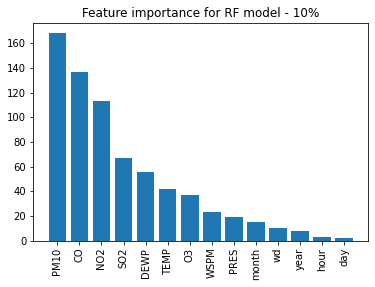

In [ ]:
plt.bar(x=rf_features['featuresname'], height=rf_features['count'])
plt.title('Feature importance for RF model - 10%')
plt.xticks(rotation='vertical')
plt.show()

### RF MODEL: 1% of data

In [ ]:
#model needs X values in a column to fit and build the tree

#get input(independent vars) labels
names = df6_1.drop(['PM2.5'], axis =1).columns
#convert input features to dataframe
dfX_train2b = pd.DataFrame(X_train2,columns=names)
dfX_test2b = pd.DataFrame(X_test2,columns=names)
dfX_train2b.head()

,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2015.0,11.0,20.0,16.0,97.0,9.0,39.0,2500.0,2.0,0.9,1023.2,-0.6,0.0,13.0,1.5,9.0
1,2013.0,11.0,24.0,8.0,48.0,27.0,25.0,500.0,38.0,9.9,1009.1,-7.3,0.0,7.0,2.2,5.0
2,2016.0,6.0,2.0,20.0,55.0,10.0,42.0,500.0,186.0,26.6,998.0,7.6,0.0,9.0,1.2,6.0
3,2016.0,8.0,11.0,20.0,206.0,2.0,42.0,1000.0,123.0,31.1,998.5,26.8,0.0,8.0,1.4,5.0
4,2014.0,1.0,16.0,5.0,585.0,38.0,128.0,6600.0,2.0,-3.2,1022.7,-5.8,0.0,4.0,1.0,9.0


In [ ]:
#create random forest regression model (RF) with the same default as DT model above

#Custom random forest regressor
from statmodels.random_forest import RandomForestRegressor

#record the time
import time
start_time = time.time()
    
rfModel2 = RandomForestRegressor(n_trees=100, max_depth=8, min_samples_split=3, loss='mse')
    #default hyperparameter used: n_trees = 100, loss ='mse'
    #updated hyperparameter: max_depth =4, min_samples_split=3 
    #with max_depth = 4, the r2 is 0.7956 for train dataset & 0.7718 for test, 
    #increase max_depth to 8 (double)

# fit the model with train dataset
rfModel2.fit(dfX_train2b, Y_train2)

print("--- %s seconds ---" % (time.time() - start_time))

--- 57.24236178398132 seconds ---


In [ ]:
#train data performance metrics
from sklearn.metrics import mean_squared_error, r2_score 

#record the time
import time
start_time = time.time()

#predict using the train dataset
y_pred_rf_tr2 = rfModel2.predict(X_train2)
print("--- %s seconds ---" % (time.time() - start_time))

#get performance metrics for train dataset
#RMSE (squared=False returns rmse)
rmse_rf_tr2 = round(mean_squared_error(Y_train2, y_pred_rf_tr2, squared=False),4) 

#R2
r2_rf_tr2 = round(r2_score(Y_train2, y_pred_rf_tr2), 4)

print('Random Forest, train 1% - Root Mean Squared error (RMSE):', rmse_rf_tr2)
print('Random Forest, train 1% - R-Squared:', r2_rf_tr2)

--- 0.9292852878570557 seconds ---
Random Forest, train 1% - Root Mean Squared error (RMSE): 21.9691
Random Forest, train 1% - R-Squared: 0.9232


In [ ]:
#predict test dataset using Random Forest Regression Model above
y_pred_rf2 = rfModel2.predict(X_test2)

#get performance metrics for test dataset
#RMSE (squared=False returns rmse)
rmse_rf2 = round(mean_squared_error(Y_test2, y_pred_rf2, squared=False),4) 

#R2
r2_rf2 = round(r2_score(Y_test2, y_pred_rf2), 4)

print('Random Forest, test 1% - Root Mean Squared error (RMSE):', rmse_rf2)
print('Random Forest, test 1% - R-Squared:', r2_rf2)

Random Forest, test 1% - Root Mean Squared error (RMSE): 27.1194
Random Forest, test 1% - R-Squared: 0.8849


#### RF 1%: Feature importance

In [ ]:
rf_features2 = rfModel2.get_features()
rf_features2 = rf_features2[rf_features2.treelevel<=3][['featurename', 
                        'tree']].groupby(['featurename'], as_index=False).count()
rf_features2.columns = ['featuresname', 'count-1%']
rf_features2 = rf_features2.sort_values('count-1%', ascending=False)
rf_features2

,featuresname,count-1%
4,PM10,168
0,CO,136
2,NO2,97
7,SO2,62
1,DEWP,51
3,O3,49
5,PRES,33
8,TEMP,33
9,WSPM,22
12,month,13


In [ ]:
#Or we can also shows per tree level 
    
rf_features3 = rfModel2.get_features()
rf_features3 = rf_features3[rf_features3.treelevel<=3]
rf_features3.sort_values('tree', ascending=False).head(15)

,featurename,treelevel,tree
80,PRES,3,99
61,PM10,3,99
60,DEWP,2,99
33,PM10,3,99
2,NO2,3,99
1,CO,2,99
0,SO2,1,99
31,CO,3,98
0,NO2,1,98
1,PM10,2,98


In [ ]:
rf_features3.groupby(['featurename','treelevel'])['featurename'].count()

featurename  treelevel
CO           1             19
             2             43
             3             74
DEWP         1              8
             2             13
             3             30
NO2          1             16
             2             33
             3             48
O3           1             14
             2             15
             3             20
PM10         1             21
             2             40
             3            107
PRES         1              2
             2              8
             3             23
RAIN         2              1
             3              2
SO2          1             12
             2             20
             3             30
TEMP         1              1
             2             11
             3             21
WSPM         1              6
             2              7
             3              9
day          2              1
             3              6
hour         2              1
             3   

### Summary of RF Feature Importance

In [ ]:
#summary of feature importance for 10% and 1% data
rf_features_all = pd.merge(rf_features, rf_features2, on="featuresname")
rf_features_all

,featuresname,count,count-1%
0,PM10,168,168
1,CO,137,136
2,NO2,113,97
3,SO2,67,62
4,DEWP,56,51
5,TEMP,42,33
6,O3,37,49
7,WSPM,23,22
8,PRES,19,33
9,month,15,13


### Random Forest evaluation

The random forest (RF) model is conducted with 10% sample to minimize computation time and memory. The model training actually takes much less time than the DT model, which is unusual.

The RF model was first initialized with the same hyperparameter as DT: max_depth = 4. However, the $R^2$ is 0.7956 for train dataset & 0.7718 for test dataset. This metrics is lower than even the regular linear model. The max_depth is increased to 8 (double) to see if performance improved. 

When the max_depth is increased to 8, the $R^2$ really improves more than the previous models. The train $R^2$ is 0.9047 and test is 0.8905. Both are great numbers with no overfitting. We can try to increase the max_depth again but we might encounter overfitting. So the max_depth of 8 is good for now. 

The RMSE score for the train model is the best so far. The RMSE for the test model is higher (27.1194 ppm) but it is still well below the standard deviation of PM2.5.

## Gradient boost 10%

Use the same code as HW 7 with additional code for feature importance
Base model: n_elements : int = 100, learning_rate : float = 0.01. max_depth =5

In [ ]:
#Custom gradient boosting regressor
from statmodels.gradientboosting import GradientBoostTreeRegressor

In [ ]:
#Custom gradient boosting regressor
from statmodels.gradientboosting import GradientBoostTreeRegressor

#create Gradient Boost Regression Model 
    #since we have a lot of sample, n_elements might need to be increased
    # to cut down time, use the same  number of tree as RF to be consistent (100)
    # set learning rate (lr) as is since it is the same as the Lasso Regression optimum val. 
    # lr is a more important hyperparameter.
gbModel = GradientBoostTreeRegressor(n_elements=100, learning_rate=0.1)

#record the time
import time
start_time = time.time()

#fit the model (10% non standardized)
gbModel.fit(X_train2a, Y_train2a, feature = dfX_train2.columns) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 610.9445624351501 seconds ---


In [ ]:
#train data performance metrics

from sklearn.metrics import mean_squared_error, r2_score 

#record the time
import time
start_time = time.time()

#predict using the train dataset
y_pred_gb_tr = gbModel.predict(X_train2a)
print("--- %s seconds ---" % (time.time() - start_time))

#get performance metrics for train dataset
#RMSE (squared=False returns rmse)
rmse_gb_tr = round(mean_squared_error(Y_train2a, y_pred_gb_tr, squared=False),4) 

#R2
r2_gb_tr = round(r2_score(Y_train2a, y_pred_gb_tr), 4)

print('Gradient Boost, train 10% - Root Mean Squared error (RMSE):', rmse_gb_tr)
print('Gradient Boost, train 10% - R-Squared:', r2_gb_tr)

--- 5.97807240486145 seconds ---
Gradient Boost, train 10% - Root Mean Squared error (RMSE): 21.9358
Gradient Boost, train 10% - R-Squared: 0.9267


In [ ]:
#predict test dataset using Random Forest Regression Model above
y_pred_gb = gbModel.predict(X_test2a)

#get performance metrics for test dataset
#RMSE (squared=False returns rmse)
rmse_gb = round(mean_squared_error(Y_test2a, y_pred_gb, squared=False),4) 

#R2
r2_gb = round(r2_score(Y_test2a, y_pred_gb), 4)

print('Gradient Boost, test 10% - Root Mean Squared error (RMSE):', rmse_gb)
print('RGradient Boost, test 10% - R-Squared:', r2_gb)

Gradient Boost, test 10% - Root Mean Squared error (RMSE): 23.7653
RGradient Boost, test 10% - R-Squared: 0.917


In [ ]:
gb_features = gbModel.get_features()
gb_features = gb_features[gb_features.treelevel<=3][['featurename', 
                        'tree']].groupby(['featurename'], as_index=False).count()
gb_features.columns = ['featuresname', 'count_GB']
gb_features = gb_features.sort_values('count_GB', ascending=False)
gb_features

,featuresname,count_GB
4,PM10,142
0,CO,102
1,DEWP,78
2,NO2,67
7,SO2,47
12,month,44
8,TEMP,40
3,O3,39
5,PRES,31
11,hour,29


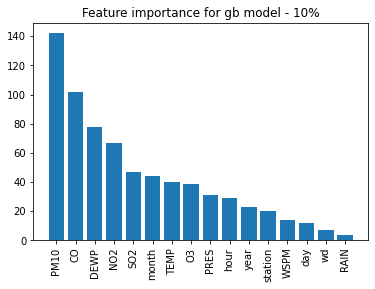

In [ ]:
plt.bar(x=gb_features['featuresname'], height=gb_features['count_GB'])
plt.title('Feature importance for gb model - 10%')
plt.xticks(rotation='vertical')
plt.show()

### GB evaluation

Boosting technique also has high computational time similar to RF as we are creating sequential decision trees (in this case n_trees = 100) or "weak learners". The computational time (610 seconds) is comparable to the RF computational time (665 seconds). 

The RMSE & $R^2$ values for train and test data is summarized below:
* Gradient Boost, train 10% - Root Mean Squared error (RMSE): 21.9358
* Gradient Boost, train 10% - R-Squared: 0.9267
* Gradient Boost, test 10% - Root Mean Squared error (RMSE): 23.7653
* Gradient Boost, test 10% - R-Squared: 0.917

These $R^2$ numbers are the highest so far and the RMSE numbers are the lowest so far. Hence, Gradient Boost is a good model for the regression. 



## K Nearest Neighbor 10%

Will evaluate the regression using K_Nearest Neighbor first since computation time is lower than decision tree or bagging & boosting method. 

In [ ]:
## imports for KNN custom model##
    #custom model source: Knn model.ipynb
import numpy as np
from scipy import stats
from typing import Dict, Any
from abc import ABC,abstractmethod
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
#define the KNN Class

class KNN(ABC):
    """
    Base class for KNN implementations
    """
    
    def __init__(self, K : int = 3, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K      -> integer specifying number of neighbours to consider
            metric -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
            p      -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # check distance is a valid entry
        valid_distance = ['minkowski','cosine']
        if metric not in valid_distance:
            msg = "Entered value for metric is not valid. Pick one of {}".format(valid_distance)
            raise ValueError(msg)
        # check minkowski p parameter
        if (metric == 'minkowski') and (p <= 0):
            msg = "Entered value for p is not valid. For metric = 'minkowski', p >= 1"
            raise ValueError(msg)
        # store/initialise input parameters
        self.K       = K
        self.metric  = metric
        self.p       = p
        self.X_train = np.array([])
        self.y_train = np.array([])
        
    def __del__(self) -> None:
        """
        Destructor function. 
        """
        del self.K
        del self.metric
        del self.p
        del self.X_train
        del self.y_train
      
    def __minkowski(self, x : np.array) -> np.array:
        """
        Private function to compute the minkowski distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return np.power(np.sum(np.power(np.abs(self.X_train - x),self.p),axis=1),1/self.p)
    
    def __cosine(self, x : np.array) -> np.array:
        """
        Private function to compute the cosine distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return (1 - (np.dot(self.X_train,x)/(np.linalg.norm(x)*np.linalg.norm(self.X_train,axis=1))))
    
    def __distances(self, X : np.array) -> np.array:
        """
        Private function to compute distances to each point x in X[x,:]
        Inputs:
            X -> numpy array of points [x]
        Outputs:
            D -> numpy array containing distances from x to all points in the training set.
        """
        # cover distance calculation
        if self.metric == 'minkowski':
            D = np.apply_along_axis(self.__minkowski,1,X)
        elif self.metric == 'cosine':
            D = np.apply_along_axis(self.__cosine,1,X)
        # return computed distances
        return D
    
    @abstractmethod
    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        """
        pass
        
    def fit(self, X : np.array, y : np.array) -> None:
        """
        Public training function for the class. It is assummed input X has been normalised.
        Inputs:
            X -> numpy array containing the predictor features
            y -> numpy array containing the labels associated with each value in X
        """
        # store training data
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)
        
    def predict(self, X : np.array) -> np.array:
        """
        Public prediction function for the class. 
        It is assummed input X has been normalised in the same fashion as the input to the training function
        Inputs:
            X -> numpy array containing the predictor features
        Outputs:
           y_pred -> numpy array containing the predicted labels
        """
        # ensure we have already trained the instance
        if (self.X_train.size == 0) or (self.y_train.size == 0):
            raise Exception('Model is not trained. Call fit before calling predict.')
        # compute distances
        D = self.__distances(X)
        # obtain indices for the K nearest neighbours
        idx_neighbours = D.argsort()[:,:self.K]
        # compute predictions
        y_pred = self._generate_predictions(idx_neighbours)
        # return results
        return y_pred
    
    def get_params(self, deep : bool = False) -> Dict:
        """
        Public function to return model parameters
        Inputs:
            deep -> boolean input parameter
        Outputs:
            Dict -> dictionary of stored class input parameters
        """
        return {'K':self.K,
                'metric':self.metric,
                'p':self.p}

In [ ]:
class KNNRegressor(KNN):
    """
    Class for KNN regression implementation
    """
    
    def __init__(self, K : int = 3, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K       -> integer specifying number of neighbours to consider
            metric  -> string to indicate the distance metric to use (valid entries are 'minkowski' and 'cosine')
            p       -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # call base class initialiser
        super().__init__(K,metric,p)
        
    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        Inputs:
            idx_neighbours -> indices of nearest neighbours
        Outputs:
            y_pred -> numpy array of prediction results
        """
        # compute the mean label for each submitted sample
        y_pred = np.mean(self.y_train[idx_neighbours],axis=1)         
        # return result
        return y_pred

In [ ]:
#record the time
import time
start_time = time.time()

#fit the model
  #set all parameters as standard first
KNNmodel = KNNRegressor(K=3, metric = 'minkowski', p = 2) #p=2 is eucledian distance, p=1 is manhattan
KNNmodel.fit(X_train_std, Y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.011998176574707031 seconds ---


In [ ]:
#train data performance metrics
from sklearn.metrics import mean_squared_error, r2_score 

y_pred_tr_knn = KNNmodel.predict(X_train_std)

#RMSE (squared=False returns rmse)
rmse_knn_tr = round(mean_squared_error(Y_train, y_pred_tr_knn, squared=False),4) 
#R2
r2_knn_tr = round(r2_score(Y_train, y_pred_tr_knn), 4)
print('KNN, train - Root Mean Squared Error (RMSE):', rmse_knn_tr)
print('KNN, train - R-Squared:', r2_knn_tr)

MemoryError: Unable to allocate 696. GiB for an array with shape (305734, 305734) and data type float64

### Use 1% of sampled df

Still get memory error when running with 10% sample. So use 1% instead (rechecked with Lasso again above and $R^2$ and RMSE not much changed.

In [ ]:
#record the time
import time
start_time = time.time()

#fit the model
  #set all parameters as standard first
    #from cross validation below, optimum K = 5.
KNNmodel2 = KNNRegressor(K=5, metric = 'minkowski', p = 2) #p=2 is eucledian distance, p=1 is manhattan
KNNmodel2.fit(X_train_std2, Y_train2)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


In [ ]:
#train data performance metrics
from sklearn.metrics import mean_squared_error, r2_score 

#record the time
import time
start_time = time.time()

#predict
y_pred_tr_knn = KNNmodel2.predict(X_train_std2)
print("--- %s seconds ---" % (time.time() - start_time))

#RMSE (squared=False returns rmse)
rmse_knn_tr = round(mean_squared_error(Y_train2, y_pred_tr_knn, squared=False),4) 
#R2
r2_knn_tr = round(r2_score(Y_train2, y_pred_tr_knn), 4)
print('KNN, train - Root Mean Squared Error (RMSE):', rmse_knn_tr)
print('KNN, train - R-Squared:', r2_knn_tr)

--- 3.570439100265503 seconds ---
KNN, train - Root Mean Squared Error (RMSE): 27.633
KNN, train - R-Squared: 0.8785


In [ ]:
#record the time
import time
start_time = time.time()

#predict test data
y_pred_knn = KNNmodel2.predict(X_test_std2)
print("--- %s seconds ---" % (time.time() - start_time))

#RMSE (squared=False returns rmse)
rmse_knn = round(mean_squared_error(Y_test2, y_pred_knn, squared=False),4) 
#R2
r2_knn = round(r2_score(Y_test2, y_pred_knn), 4)
print('KNN 1%, test - Root Mean Squared Error (RMSE):', rmse_knn)
print('KNN 1%, test - R-Squared:', r2_knn)

--- 0.8893346786499023 seconds ---
KNN 1%, test - Root Mean Squared Error (RMSE): 35.009
KNN 1%, test - R-Squared: 0.8081


### KNN Model Analysis

The KNN model successfully fit and predict the target variable (PM2.5) but it requires high computational storage. The train and test RMSE is lower than the standard deviation of PM2.5 so it is a good sign. The $R^2$ of train is pretty good as it is greater than 80% (second highest so far). It doesn't have overfitting issue because the testdata $R^2$ is only 7% lower than the train. Hence, it has low bias and low variance.

The downside is we are unable to extract feature importance from the model. We can modify the code to get the neighboring distance and see which one has the smallest distance for each cluster but this is not easily obtained. 

Note: Only 1% of sample is used. 

#### KNN cross-validation to find best K

In [ ]:
## define the scoring metrics ##
from sklearn.metrics import mean_squared_error,\
                            mean_absolute_error,\
                            r2_score,\
                            make_scorer

scoring_metrics = {'mse' : make_scorer(mean_squared_error), 
                   'mae': make_scorer(mean_absolute_error),
                    'R2' : make_scorer(r2_score)}

In [ ]:
## define a helper function for our analysis ##
def cv_regressor_analysis(pipe : Any, 
                          X : np.array, 
                          y : np.array, 
                          k : int, 
                          scoring_metrics : Dict,
                          metric : str) -> None:
    """
    Function to carry out cross-validation analysis for input KNN regressor
    Inputs:
        pipe            -> input pipeline containing preprocessing and KNN regressor
        X               -> numpy array of predictors
        y               -> numpy array of labels
        k               -> integer value for number of nearest neighbours to consider
        scoring_metrics -> dictionary of scoring metrics to consider 
        metric          -> string indicating distance metric used
    """
    # print hyperparameter configuration
    print('RESULTS FOR K = {0}, {1}'.format(k,metric))
    # run cross validation
    dcScores = cross_validate(pipe,X,y,cv=10,scoring=scoring_metrics)
    # report results
    print('Mean MSE: %.4f' % np.mean(dcScores['test_mse']))
    print('Mean MAE: %.4f' % np.mean(dcScores['test_mae']))
    print('Mean R^2: %.4f' % np.mean(dcScores['test_R2']))

In [ ]:
#set 3 ks to cross-validate (prefer odd numbered to break ties)
    #k=3 is no longer calculated to reduce computational time
K = [3,5,7,9] 

#record the time
import time
start_time = time.time()

for k in K:
  #only vary in k number, use euclidean distance still
  cv_regressor_analysis(KNNRegressor(k, metric = 'minkowski', p = 2), 
                        X_train_std2, Y_train2, k, scoring_metrics, 'EUCLIDEAN DISTANCE')

print("--- %s seconds ---" % (time.time() - start_time))

RESULTS FOR K = 3, EUCLIDEAN DISTANCE
Mean MSE: 1234.9134
Mean MAE: 24.1767
Mean R^2: 0.8005
RESULTS FOR K = 5, EUCLIDEAN DISTANCE
Mean MSE: 1224.8902
Mean MAE: 23.8532
Mean R^2: 0.8022
RESULTS FOR K = 7, EUCLIDEAN DISTANCE
Mean MSE: 1210.7892
Mean MAE: 23.7386
Mean R^2: 0.8044
RESULTS FOR K = 9, EUCLIDEAN DISTANCE
Mean MSE: 1225.9166
Mean MAE: 23.7664
Mean R^2: 0.8026
--- 12.656085968017578 seconds ---


From cross-validation above, K=5 produces the best metrics. The value are very similar to K=7 but it will require more computation time and MAE is higher. So run the model above with K =5.

## Summary of Models' Performance Metrics

In [ ]:
#summary of all metrics:

df_metrics = pd.DataFrame(np.array([
        ['Linear Regression (100%)', rmse_linear_tr, rmse_linear, r2_linear_tr, r2_linear, 7.96],
        ['Lasso Regression (100%)', rmse_lasso_tr, rmse_lasso, r2_lasso_tr, r2_lasso, 7.99], 
        ['Lasso Regression (10%)', rmse_lasso_tr2, rmse_lasso2, r2_lasso_tr2, r2_lasso2, 0.295],
        ['Decision Tree - DT (10%)', rmse_dt_tr, rmse_dt, r2_dt_tr, r2_dt, 287.21], 
        ['Random Forest - RF (10%)', rmse_rf_tr, rmse_rf, r2_rf_tr, r2_rf, 665.88],
        ['Random Forest - RF (1%)', rmse_rf_tr2, rmse_rf2, r2_rf_tr2, r2_rf2, 57.24],
        ['Gradient Boost - GB (10%)', rmse_gb_tr, rmse_gb, r2_gb_tr, r2_gb, 610.94],
        ['K-Nearest Neighbor -KNN (1%)', rmse_knn_tr, rmse_knn, r2_knn_tr, r2_knn, 3.57]
        ]),
        columns=['Regression Model (% sample)', 'RMSE (train)', 'RMSE (test)', '$R^2$ (train)', 
             '$R^2$ (test)', 'computation time (sec)'])
print('Performance metrics for Air Quality dataset to predict PM2.5 using ALL given features')
df_metrics

Performance metrics for Air Quality dataset to predict PM2.5 using ALL given features


,Regression Model (% sample),RMSE (train),RMSE (test),$R^2$ (train),$R^2$ (test),computation time (sec)
0,Linear Regression (100%),30.4902,30.1671,0.8561,0.8552,7.96
1,Lasso Regression (100%),30.4918,30.1697,0.8561,0.8551,7.99
2,Lasso Regression (10%),30.6266,31.4988,0.8571,0.8542,0.295
3,Decision Tree - DT (10%),27.2196,27.569,0.8871,0.8883,287.21
4,Random Forest - RF (10%),25.0058,27.2963,0.9047,0.8905,665.88
5,Random Forest - RF (1%),21.9691,27.1194,0.9232,0.8849,57.24
6,Gradient Boost - GB (10%),21.9358,23.7653,0.9267,0.917,610.94
7,K-Nearest Neighbor -KNN (1%),27.633,35.009,0.8785,0.8081,3.57


The model performance metrics above summarizes 5 different models to predict the dependent variable, PM2.5, in various Beijing cities using the air pollutants dataset as well as atmospheric weather stations data. The regression models successfully predict the train and test data (splitted 80-20) with quite good accuracy. Most of the model can explain >= 85% of variance in the dataset, even with smaller fraction of dataset. 

The linear and lasso regression is conducted using 100% of sample (382,168 rows). Since the requirement is only 10,000 rows and most of the numerical features are in standard/skewed normal distribution, by central tendency the model should be scalable. Hence, only 10% of dataset is used in the more complex model like DT, RF, and GB. Lasso regression was modeled using 100% and 10% (38,217 rows) data and the RMSE & $R^2$ values are very similar with <10% of computational time. 

The chosen model for this dataset is either Lasso Regression or Gradient Boosting depending on the use case and performance target preference. Gradient Boost produce the highest $R^2$ and lowest RMSE for train and test data with ~ 611 seconds of computational time. Lasso Regression also produce comparable performance metrics with very fast calculation (8seconds). Hence, Lasso Regression should be chosen if fast result is needed and Gradient Boosting should be chosen if we want the highest accuracy. We can also increase the number of trees parameter for Gradient Boost to get higher accuracy score as we don't have to worry about overfitting for now, but the computational time will also increase.   

Two additional observations from the summary table:
* Decision tree has lower train vs test accuracy difference compare to Random Forest. We might be able to adjust the hyperparameter for RF to reduce the slight overfitting.
* KNN model is the odd one from the list as it is using 1% of the sample only. If larger memory avaialble, should run KNN with 10% sample so it is the same comparison. 

In [ ]:
#non-negative coefficients
top_8 = lassoImportantfeatures['Features'].head(8)
top_8.to_numpy()

array(['PM10', 'CO', 'DEWP', 'O3', 'PRES', 'SO2', 'NO2', 'year'],
      dtype=object)

### Summary Feature Importance

In [ ]:
#linear and lasso regression 
#summary of feature importance for 100% data
lmlr_features = pd.merge(df_lm_coef, lassoImportantfeatures, on="Features")
lmlr_features
#top 3 for LM: Year, SO2, and O3
#top 3 for LR: PM10, CO, and DEWP

,Features,Importance_LM,Importance_LR
0,year,79.509957,0.613737
1,SO2,49.612833,2.791035
2,O3,23.369215,5.535800
3,RAIN,19.943520,-0.331664
4,TEMP,5.815104,-11.944476
5,DEWP,4.218943,19.380948
6,NO2,2.844242,2.553422
7,CO,2.675309,23.477719
8,month,0.649361,-1.470762
9,WSPM,-0.073486,-0.687162


In [ ]:
#feature importance from DT model (max_depth =4)
dtFeatures.sort_values('treelevel')
#top features are PM10, CO, SO2, NO2, and DEWP

,featurename,treelevel
30,PM10,0
14,PM10,1
6,PM10,2
13,CO,2
2,CO,3
12,PM10,3
24,SO2,3
0,PM10,4
3,CO,4
8,NO2,4


In [ ]:
#feature importance from RF Model (both 10% and 1% data)
rf_features_all

,featuresname,count,count-1%
0,PM10,168,168
1,CO,137,136
2,NO2,113,97
3,SO2,67,62
4,DEWP,56,51
5,TEMP,42,33
6,O3,37,49
7,WSPM,23,22
8,PRES,19,33
9,month,15,13


In [ ]:
#feature importance from GB Model
gb_features

,featuresname,count
4,PM10,142
0,CO,102
1,DEWP,78
2,NO2,67
7,SO2,47
12,month,44
8,TEMP,40
3,O3,39
5,PRES,31
11,hour,29


**Summary of feature importance:**

The top 3 features for each models (except KNN) are:
* Linear Regression: Year, SO2, and O3
* Lasso Regression: PM10, CO, and DEWP
* Decision Tree: PM10, CO, SO2
* Random Forest: PM10, CO, NO2 (then SO2, and DEWP)
* Gradient boost: PM10, CO, DEWP

Most of the models aggrees that the most important feature is PM10 (particulate matter under 10 micron). This is expected as PM2.5 is part of PM10. The second highest is CO for 4 models. This is also expected as carbon monoxide level (CO) is emitted during fossil fuel combustion usage in the city (transportation, industrial, etc.). Combustion produces by products such as ashes, dust, and particulates. Another cause is forest fire, which is a recent low air quality event in Seattle, WA. Forest fires (natural or unnatural) produces dust and ashes that increases the particulate levels in the air.  We can track the PM10 and CO concentratios in the air to estimate the PM2.5 concentrations. 

The third important feature (tie) is SO2 or DEWP. SO2 is also a primary pollutant resulted from byproduct of combustion process. It is reasonable that it has a strong relationship with PM2.5 particulate matter. 

# Model Training & Eval - without PM10

## Linear and Lasso 10%

In [ ]:
#Train the model: linear regression 
    #default optimizer is Batch Gradient Descent (unchanged)
    #default hyperparameter: n_iter=1000, lr=1e-2, alpha=1.0 (changed alpha)

linearModel0 = LinearRegression(n_iter=1000, lr=0.05, solver='bgd') #lr=0.05 is slightly better
    #use batch gradient descent optimizer
%time linearModel0.fit(X_train_std0, Y_train0) 
print("Linear model cofficients :",linearModel.coef_)

CPU times: total: 719 ms
Wall time: 185 ms
Linear model cofficients : [ 7.90069015e+01  1.04847437e+00 -3.08068243e+00  7.19895154e-01
 -6.57434478e-02  6.20597603e+00  2.38174030e+01  4.54988254e+01
  1.35078373e+01 -1.74229592e+01 -2.80947537e+00  2.46097262e+01
 -1.39006256e+00  8.73974630e-01  5.28174058e+00 -1.26978362e+00]


In [ ]:
#predict the train dataset
%time y_pred_tr_linear0 = linearModel0.predict(X_train_std0)

#train data performance metrics
from sklearn.metrics import mean_squared_error, r2_score 

#RMSE (squared=False returns rmse)
rmse_linear_tr0 = round(mean_squared_error(Y_train0, y_pred_tr_linear0, squared=False),4) 
#R2
r2_linear_tr0 = round(r2_score(Y_train0, y_pred_tr_linear0), 4)
print('Linear Regression, train - Root Mean Squared Error (RMSE):', rmse_linear_tr0)
print('Linear Regression, train - R-Squared:', r2_linear_tr0)

CPU times: total: 62.5 ms
Wall time: 3 ms
Linear Regression, train - Root Mean Squared Error (RMSE): 43.8021
Linear Regression, train - R-Squared: 0.7032


In [ ]:
#predict the test dataset
%time y_pred_linear0 = linearModel0.predict(X_test_std0)

#test data performance metrics
#RMSE (squared=False returns rmse)
rmse_linear0 = round(mean_squared_error(Y_test0, y_pred_linear0, squared=False),4) 
#R2
r2_linear0 = round(r2_score(Y_test0, y_pred_linear0), 4)
print('Linear Regression, test - Root Mean Squared Error (RMSE):', rmse_linear0)
print('Linear Regression, test - R-Squared:', r2_linear0)

CPU times: total: 0 ns
Wall time: 0 ns
Linear Regression, test - Root Mean Squared Error (RMSE): 42.7264
Linear Regression, test - R-Squared: 0.7109


In [ ]:
df7['PM2.5'].describe()

count    38217.000000
mean        79.183005
std         80.219001
min          2.000000
25%         20.000000
50%         54.000000
75%        111.000000
max        781.000000
Name: PM2.5, dtype: float64

In [ ]:
features_name0 = df7.drop(['PM2.5'], axis =1).columns

In [ ]:
df_lm_coef0 = pd.DataFrame(list(zip(features_name0, linearModel0.coef_)),
                          columns =['Features', 'Importance'])
df_lm_coef0.sort_values(by=['Importance'], ascending=False)

,Features,Importance
0,year,79.006902
7,O3,45.498869
11,RAIN,24.609597
6,CO,23.817386
8,TEMP,13.507801
5,NO2,6.205967
14,station,5.281710
1,month,1.048474
13,WSPM,0.873974
3,hour,0.719896


### Lasso 

In [ ]:
#Train the model: lasso regression
    #default optimizer is Batch Gradient Descent (unchanged)
    #default hyperparameter: n_iter=1000, lr=1e-2, alpha=1.0 (changed alpha)

lassoModel0 = LassoRegression(lr=1e-2, alpha=0.1) #initiate alpha = 0.1 first
%time lassoModel0.fit(X_train_std0, Y_train0) 
print("Lasso model cofficients :",lassoModel0.coef_)

CPU times: total: 812 ms
Wall time: 196 ms
Lasso model cofficients : [ 79.00690138   0.99758095  -3.0192815    0.69557453  -0.24034201
   5.979896    23.38270752  46.48122741  12.54838583 -13.04081513
  -2.12610371  21.22772341  -1.15351582   0.82620103   4.40607589
  -1.27507312]


In [ ]:
#train data performance metrics
from sklearn.metrics import mean_squared_error, r2_score 

y_pred_tr_lasso0 = lassoModel0.predict(X_train_std0)

#RMSE (squared=False returns rmse)
rmse_lasso_tr0 = round(mean_squared_error(Y_train0, y_pred_tr_lasso0, squared=False),4) 
#R2
r2_lasso_tr0 = round(r2_score(Y_train0, y_pred_tr_lasso0), 4)
print('Lasso Regression without PM10 (10%), train - Root Mean Squared Error (RMSE):', rmse_lasso_tr0)
print('Lasso Regression w/o PM10 (10%), train - R-Squared:', r2_lasso_tr0)

Lasso Regression without PM10 (10%), train - Root Mean Squared Error (RMSE): 43.8328
Lasso Regression w/o PM10 (10%), train - R-Squared: 0.7028


In [ ]:
#test data performance metrics

%time y_pred_lasso0 = lassoModel0.predict(X_test_std0)

#RMSE (squared=False returns rmse)
rmse_lasso0 = round(mean_squared_error(Y_test0, y_pred_lasso0, squared=False),4) 
#R2
r2_lasso0 = round(r2_score(Y_test0, y_pred_lasso0), 4)
print('Lasso Regression w/o PM10 (10%) test data - Root Mean Squared Error (RMSE):', rmse_lasso0)
print('Lasso Regression w/o PM10 (10%) test data - R-Squared:', r2_lasso0)

CPU times: total: 0 ns
Wall time: 998 µs
Lasso Regression w/o PM10 (10%) test data - Root Mean Squared Error (RMSE): 42.7842
Lasso Regression w/o PM10 (10%) test data - R-Squared: 0.7102


In [ ]:
#use df6b column
lassoImportantfeatures0 = pd.DataFrame(data={'Features': df7.drop(['PM2.5'], axis =1).columns})
lassoImportantfeatures0["Importance"] = pd.DataFrame(lassoModel0.coef_[1:])
lassoImportantfeatures0 = lassoImportantfeatures0.sort_values(by='Importance', ascending=False)
lassoImportantfeatures0

,Features,Importance
6,CO,46.481227
5,NO2,23.382708
10,DEWP,21.227723
7,O3,12.548386
4,SO2,5.979896
13,WSPM,4.406076
0,year,0.997581
12,wd,0.826201
2,day,0.695575
3,hour,-0.240342


In [ ]:
#important features with PM10
lassoImportantfeatures2

,Features,Importance
4,PM10,49.456907
7,CO,23.990949
11,DEWP,18.141024
8,O3,5.042183
10,PRES,4.574451
6,NO2,2.521497
5,SO2,2.462648
0,year,0.986459
13,wd,-0.111955
3,hour,-0.305081


without PM10, the top features are CO, NO2, and DEWP. The accuracy dropped quite a bit to ~0.7 and RMSE increased to ~42 ppm. 

## Decision Tree (DT) 10%

In [ ]:
#model needs X values in a column to fit and build the tree

#get input(independent vars) labels
names0 = df7.drop(['PM2.5'], axis =1).columns
#convert input features to dataframe
dfX_train0 = pd.DataFrame(X_train0,columns=names0)
dfX_test0 = pd.DataFrame(X_test0,columns=names0)
dfX_train0.head()

,year,month,day,hour,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2014.0,6.0,8.0,1.0,2.0,84.0,1000.0,4.0,18.3,998.6,14.0,0.0,13.0,1.5,9.0
1,2016.0,4.0,9.0,4.0,2.0,43.0,700.0,2.0,10.1,999.3,-5.1,0.0,4.0,1.1,1.0
2,2017.0,2.0,17.0,1.0,2.0,11.0,300.0,72.0,1.4,1027.3,-20.4,0.0,1.0,4.4,11.0
3,2015.0,9.0,6.0,14.0,2.0,25.0,600.0,109.0,26.9,1008.9,13.6,0.0,2.0,2.1,11.0
4,2016.0,6.0,23.0,5.0,2.0,63.0,1000.0,26.0,24.8,998.2,20.7,0.0,6.0,0.9,11.0


In [ ]:
#create decision tree (dt) model
    #initiate with min_samples_split=3, max_depth=3 first, then increased to 4 to see if R2 increased
    #need to reshape Y to fit the model
    
dtModel0 = decisiontreeregressor(min_samples_split=3, max_depth=4) #max_depth left at 4
%time dtModel0.fit(dfX_train0,Y_train0.reshape(-1,1))

CPU times: total: 4min 29s
Wall time: 4min 29s
--- 2421.2290909290314 seconds ---


In [ ]:
#Predict the train dataset
%time y_pred_dt_tr0 = dtModel0.predict(X_train0) #need values only

#get performance metrics for train dataset
#RMSE (squared=False returns rmse)
rmse_dt_tr0 = round(mean_squared_error(Y_train0, y_pred_dt_tr0, squared=False),4) 

#R2
r2_dt_tr0 = round(r2_score(Y_train0, y_pred_dt_tr0), 4)

print('Decision Tree w/o PM10, train 10% - Root Mean Squared Error (RMSE):', rmse_dt_tr0)
print('Decision Tree w/o PM10, train 10% - R-Squared:', r2_dt_tr0)

CPU times: total: 31.2 ms
Wall time: 43.6 ms
Decision Tree w/o PM10, train 10% - Root Mean Squared Error (RMSE): 42.5898
Decision Tree w/o PM10, train 10% - R-Squared: 0.7194


In [ ]:
#Predict the test dataset
y_pred_dt0 = dtModel0.predict(X_test0) #need values only

#get performance metrics for test dataset
#RMSE (squared=False returns rmse)
rmse_dt0 = round(mean_squared_error(Y_test0, y_pred_dt0, squared=False),4) 

#R2
r2_dt0 = round(r2_score(Y_test0, y_pred_dt0), 4)

print('Decision Tree w/o PM10, test 10% - Root Mean Squared Error (RMSE):', rmse_dt0)
print('Decision Tree w/o PM10, test 10% - R-Squared:', r2_dt0)

Decision Tree w/o PM10, test 10% - Root Mean Squared Error (RMSE): 42.1814
Decision Tree w/o PM10, test 10% - R-Squared: 0.7183


In [ ]:
dtModel0.print_tree()

|- CO <= 1200.0 :Variance Red 2758.9917
 left-->|- CO <= 700.0 :Variance Red 501.5983
  left-->|- CO <= 500.0 :Variance Red 93.1048
    left-->|- SO2 <= 48.0 :Variance Red 57.2823
        left-->|- PRES <= 1014.9 :Variance Red 23.7294
                left-->22.7982
                right-->12.8543
        right-->|- O3 <= 10.0 :Variance Red 6619.5939
                left-->339.5
                right-->159.4
    right-->|- DEWP <= -6.7 :Variance Red 85.5861
        left-->|- hour <= 11.0 :Variance Red 27.2997
                left-->17.7455
                right-->28.1987
        right-->|- month <= 7.0 :Variance Red 70.5855
                left-->51.7315
                right-->34.6029
  right-->|- DEWP <= -5.6 :Variance Red 175.0267
    left-->|- SO2 <= 21.0 :Variance Red 118.8132
        left-->|- DEWP <= -10.6 :Variance Red 60.3696
                left-->32.4743
                right-->49.7952
        right-->|- SO2 <= 63.0 :Variance Red 146.5977
                left-->56.5582
      

In [ ]:
dtFeatures0 = pd.DataFrame(dtModel0.get_features())
dtFeatures0.columns = ['featurename','treelevel']
dtFeatures0 = dtFeatures0.drop_duplicates()
dtFeatures0.sort_values('treelevel')

,featurename,treelevel
30,CO,0
14,CO,1
6,CO,2
28,NO2,2
13,DEWP,2
2,SO2,3
20,NO2,3
5,DEWP,3
12,CO,3
23,CO,4


With max_depth =4 and without PM10, the tree only use CO as features until level 2. The next features are NO2 and DewPoint, which are the same as Linear and Lasso Regression.

In [ ]:
lassoImportantfeatures0['Features'].head(8).to_numpy()

array(['CO', 'NO2', 'DEWP', 'O3', 'SO2', 'WSPM', 'year', 'wd'],
      dtype=object)

## Random Forest 10%

In [ ]:
#create random forest regression model (RF) without PM10 feature
    
rfModel0 = RandomForestRegressor(n_trees=100, max_depth=8, min_samples_split=3, loss='mse')
    #default hyperparameter used: n_trees = 100, loss ='mse'
    #updated hyperparameter: max_depth =4, min_samples_split=3 
    #with max_depth = 4, the r2 is 0.7956 for train dataset & 0.7718 for test, 
    #increase max_depth to 8 (double)

# fit the model with train dataset
%time rfModel0.fit(X_train0, Y_train0)

CPU times: total: 7min 28s
Wall time: 7min 30s


In [ ]:
#predict using the train dataset
%time y_pred_rf_tr0 = rfModel0.predict(X_train0)

#get performance metrics for train dataset
#RMSE (squared=False returns rmse)
rmse_rf_tr0 = round(mean_squared_error(Y_train0, y_pred_rf_tr0, squared=False),4) 

#R2
r2_rf_tr0 = round(r2_score(Y_train0, y_pred_rf_tr0), 4)

print('Random Forest w/o PM10, train 10% - Root Mean Squared error (RMSE):', rmse_rf_tr0)
print('Random Forest w/o PM10, train 10% - R-Squared:', r2_rf_tr0)

CPU times: total: 9.52 s
Wall time: 9.51 s
Random Forest w/o PM10, train 10% - Root Mean Squared error (RMSE): 39.2446
Random Forest w/o PM10, train 10% - R-Squared: 0.7618


In [ ]:
#predict test dataset using Random Forest Regression Model above
y_pred_rf0 = rfModel0.predict(X_test0)

#get performance metrics for test dataset
#RMSE (squared=False returns rmse)
rmse_rf0 = round(mean_squared_error(Y_test0, y_pred_rf0, squared=False),4) 

#R2
r2_rf0 = round(r2_score(Y_test0, y_pred_rf0), 4)

print('Random Forest w/o PM10, test 10% - Root Mean Squared error (RMSE):', rmse_rf0)
print('Random Forest w/o PM10, test 10% - R-Squared:', r2_rf0)

Random Forest w/o PM10, test 10% - Root Mean Squared error (RMSE): 39.4304
Random Forest w/o PM10, test 10% - R-Squared: 0.7538


In [ ]:
#get list of features
rf_features0 = rfModel0.get_features()
rf_features0 = rf_features0[rf_features0.treelevel<=3][['featurename', 
                        'tree']].groupby(['featurename'], as_index=False).count()
rf_features0.columns = ['featuresname', 'count']
rf_features0 = rf_features0.sort_values('count', ascending=False)
rf_features0

,featuresname,count
2,NO2,135
0,CO,108
6,SO2,101
1,DEWP,76
3,O3,58
7,TEMP,44
4,PRES,39
11,month,38
8,WSPM,37
13,wd,20


## Gradient  Boost 10%

In [ ]:
#Custom gradient boosting regressor
from statmodels.gradientboosting import GradientBoostTreeRegressor

#create Gradient Boost Regression Model 
    #since we have a lot of sample, n_elements might need to be increased
    # to cut down time, use the same  number of tree as RF to be consistent (100)
    # set learning rate (lr) as is since it is the same as the Lasso Regression optimum val. 
    # lr is a more important hyperparameter.
gbModel0 = GradientBoostTreeRegressor(n_elements=100, learning_rate=0.1)

#record the time
import time
start_time = time.time()

#fit the model (10% non standardized)
gbModel0.fit(X_train0, Y_train0, feature = dfX_train0.columns) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 399.8108730316162 seconds ---


In [ ]:
#train data performance metrics

from sklearn.metrics import mean_squared_error, r2_score 

#record the time
import time
start_time = time.time()

#predict using the train dataset
y_pred_gb_tr0 = gbModel0.predict(X_train0)
print("--- %s seconds ---" % (time.time() - start_time))

#get performance metrics for train dataset
#RMSE (squared=False returns rmse)
rmse_gb_tr0 = round(mean_squared_error(Y_train0, y_pred_gb_tr0, squared=False),4) 

#R2
r2_gb_tr0 = round(r2_score(Y_train0, y_pred_gb_tr0), 4)

print('Gradient Boost, train 10% - Root Mean Squared error (RMSE):', rmse_gb_tr0)
print('Gradient Boost, train 10% - R-Squared:', r2_gb_tr0)

--- 5.832566022872925 seconds ---
Gradient Boost, train 10% - Root Mean Squared error (RMSE): 33.6474
Gradient Boost, train 10% - R-Squared: 0.8229


In [ ]:
#predict test dataset using Random Forest Regression Model above
y_pred_gb0 = gbModel0.predict(X_test0)

#get performance metrics for test dataset
#RMSE (squared=False returns rmse)
rmse_gb0 = round(mean_squared_error(Y_test0, y_pred_gb0, squared=False),4) 

#R2
r2_gb0 = round(r2_score(Y_test0, y_pred_gb0), 4)

print('Gradient Boost, test 10% - Root Mean Squared error (RMSE):', rmse_gb0)
print('RGradient Boost, test 10% - R-Squared:', r2_gb0)

Gradient Boost, test 10% - Root Mean Squared error (RMSE): 36.9453
RGradient Boost, test 10% - R-Squared: 0.7824


In [ ]:
gb_features0 = gbModel0.get_features()
gb_features0 = gb_features0[gb_features0.treelevel<=3][['featurename', 
                        'tree']].groupby(['featurename'], as_index=False).count()
gb_features0.columns = ['featuresname', 'count_GB']
gb_features0 = gb_features0.sort_values('count_GB', ascending=False)
gb_features0

,featuresname,count_GB
0,CO,108
1,DEWP,97
2,NO2,71
3,O3,63
6,SO2,58
11,month,50
7,TEMP,49
4,PRES,42
14,year,33
9,day,29


## KNN 1%

KNN is not conducted as we need 1% of data. This is not a direct comparison with other models.

## Summary of without PM10 metrics

In [ ]:
#summary of all metrics:

df_metrics0 = pd.DataFrame(np.array([
        ['Linear Regression (10%)', rmse_linear_tr0, rmse_linear0, r2_linear_tr0, r2_linear0, 0.185],
        ['Lasso Regression (10%)', rmse_lasso_tr0, rmse_lasso0, r2_lasso_tr0, r2_lasso0, 0.196], 
        ['Decision Tree - DT (10%)', rmse_dt_tr0, rmse_dt0, r2_dt_tr0, r2_dt0, 259], 
        ['Random Forest - RF (10%)', rmse_rf_tr0, rmse_rf0, r2_rf_tr0, r2_rf0, 452],
        ['Gradient Boost - GB (10%)', rmse_gb_tr0, rmse_gb0, r2_gb_tr0, r2_gb0, 399]
        ]),
        columns=['Regression Model (% sample)', 'RMSE (train)', 'RMSE (test)', '$R^2$ (train)', 
             '$R^2$ (test)', 'computation time (sec)'])
print('Performance metrics for Air Quality dataset to predict PM2.5 WITHOUT PM10 feature')
df_metrics0

Performance metrics for Air Quality dataset to predict PM2.5 WITHOUT PM10 feature


,Regression Model (% sample),RMSE (train),RMSE (test),$R^2$ (train),$R^2$ (test),computation time (sec)
0,Linear Regression (10%),43.3015,44.063,0.7068,0.6904,0.185
1,Lasso Regression (10%),43.3358,44.0746,0.7063,0.6903,0.196
2,Decision Tree - DT (10%),42.1109,43.8803,0.7227,0.693,259
3,Random Forest - RF (10%),38.7346,41.4264,0.7654,0.7264,452
4,Gradient Boost - GB (10%),33.6474,36.9453,0.8229,0.7824,399


In [ ]:
#summary of metrics withPM10 (copied from above):
print('Performance metrics for Air Quality dataset to predict PM2.5 WITH PM10 feature')
df_metrics
#For comparison only

Performance metrics for Air Quality dataset to predict PM2.5 WITH PM10 feature


,Regression Model (% sample),RMSE (train),RMSE (test),$R^2$ (train),$R^2$ (test),computation time (sec)
0,Linear Regression (100%),30.4902,30.1671,0.8561,0.8552,7.96
1,Lasso Regression (100%),30.4918,30.1697,0.8561,0.8551,7.99
2,Lasso Regression (10%),30.6266,31.4988,0.8571,0.8542,0.295
3,Decision Tree - DT (10%),27.2196,27.569,0.8871,0.8883,287.21
4,Random Forest - RF (10%),25.0058,27.2963,0.9047,0.8905,665.88
5,Random Forest - RF (1%),21.9691,27.1194,0.9232,0.8849,57.24
6,Gradient Boost - GB (10%),21.9358,23.7653,0.9267,0.917,610.94
7,K-Nearest Neighbor -KNN (1%),27.633,35.009,0.8785,0.8081,3.57


KNN is not conducted as it requires 1% of data (anomaly).

The performance metrics of the models without PM10 column is lower than before (suspected in previous analysis). $R^2$ are still ~70% so they still explained >70% of variance in PM2.5 concentration without PM10 concentration as one of the independent variable. The accuracy might increase if we remove the outlier in the pollutants column (future work). The highest accuracy is also Gradient Boost, the only one with higher than 80% accuracy for train data. 

The RMSE is 10-15ppm higher than before. The removal of PM10 feature increases the error of the model. Nevertheless, it is still ~ 50% of the std deviation of PM2.5 (~ 80 ppm) so this RMSE range is still acceptable.

Similar to the previous result, Gradient boosting is the best regression model to predict the PM2.5. 

**Summary of feature importance:**

The top 3 features for each models (without PM10) are:
* Linear Regression: Year, 03, and rain
* Lasso Regression: CO, NO2, and DEWP
* Decision Tree: CO, NO2, Press/DewP (tie)
* Random Forest: NO2, CO, SO2
* Gradient boost: CO, DEWP, NO2

Except linear regression, all other models features are pretty similar with CO as the main feature and NO2, DEW Point, and SO2 following behind. These are all primary pollutants with one weather data. Hence, we can track just the primary pollutants with DEWP to reduce budget if necessary. 

# Project Report

Project report is available for this code to summarize the steps and important points found in this code. See the submitted pdf or word document.